# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

df = pd.read_csv("signnames.csv")

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]
#print(train['sizes'][0])
#print(train['coords'][0])
# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))
# also can use
#n_classes = df.shape[0]
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [4]:
#counts function(used to plotting the count of each sign) 
def counts(_counts, titles):
    _nums = []
    _signs = []
    for nums in _counts:
        _signs.append(nums)
        _nums.append(_counts[nums])
    _nums_ = pd.Series.from_array(_nums)
    plt.figure(figsize = (12,8))
    fig = _nums_.plot(kind = 'bar')
    fig.set_title(titles)
    fig.set_ylabel("numbers")
    fig.set_xlabel("signs No.")
    fig.set_xticklabels(_signs)
    plt.show()

In [5]:
#this function is used to plotting traffic sign images, plot 6 * 7 subplot images
def image_visiulization(x, y):
    data = np.zeros((43,1))
    for i in range(len(y)):
        if(data[y[i]] == 0):
            data[y[i]] = i
        if(np.min(data[:]>0)):
            break
    plt.figure(figsize = (12,8), dpi = 320)
    for i in range(43):
        ax = plt.subplot(3,15,i+1)
        ax.axis('off')
        image = x[int(data[i]),:,:,:]
        ax.set_title("No:{0}".format(i))
        ax.imshow(image)
    plt.show()

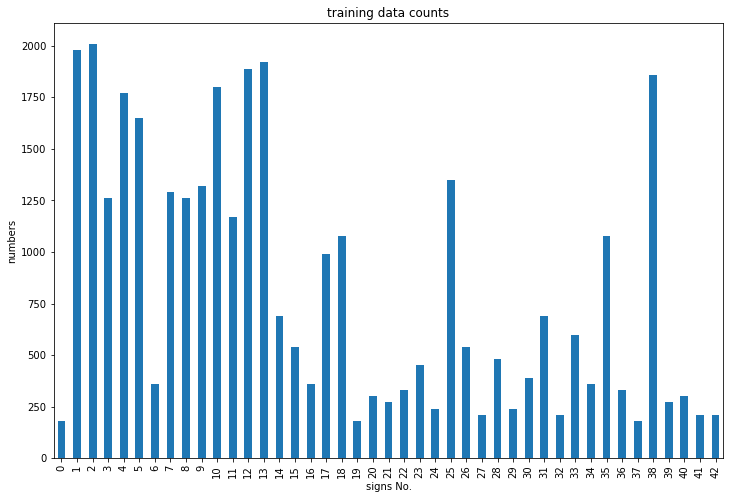

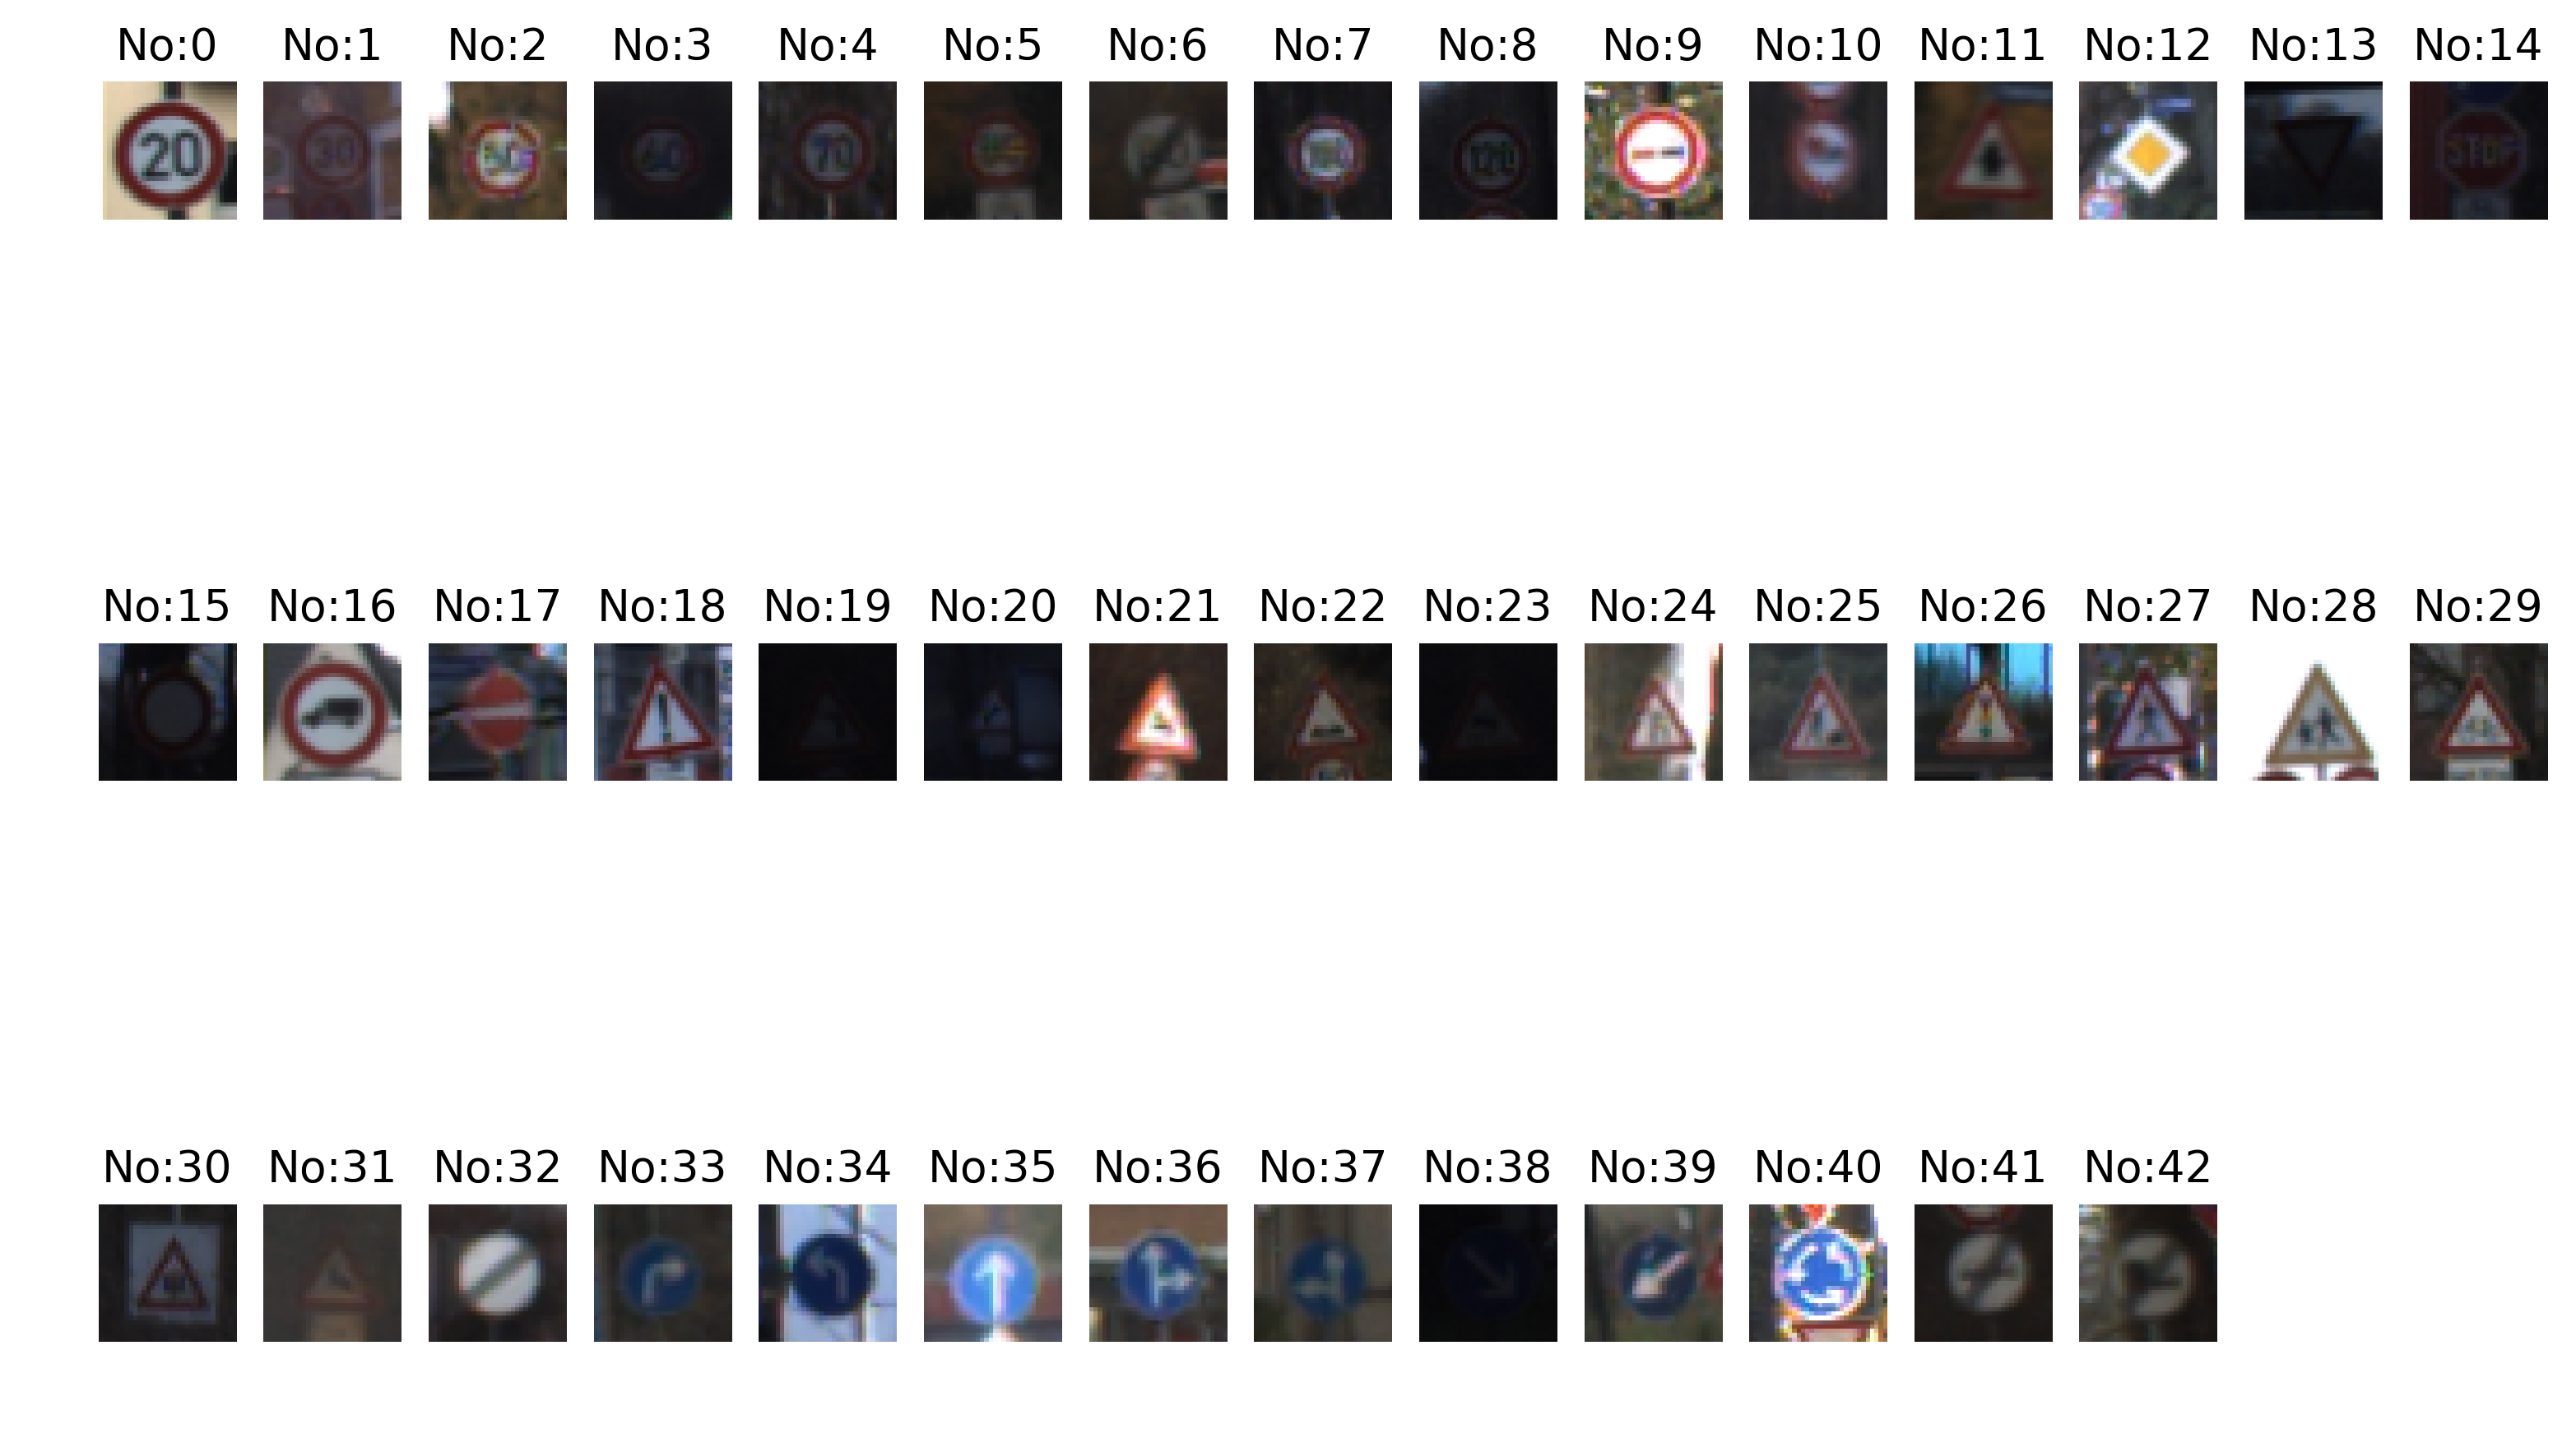

Label Counts: {0: 180, 1: 1980, 2: 2010, 3: 1260, 4: 1770, 5: 1650, 6: 360, 7: 1290, 8: 1260, 9: 1320, 10: 1800, 11: 1170, 12: 1890, 13: 1920, 14: 690, 15: 540, 16: 360, 17: 990, 18: 1080, 19: 180, 20: 300, 21: 270, 22: 330, 23: 450, 24: 240, 25: 1350, 26: 540, 27: 210, 28: 480, 29: 240, 30: 390, 31: 690, 32: 210, 33: 599, 34: 360, 35: 1080, 36: 330, 37: 180, 38: 1860, 39: 270, 40: 300, 41: 210, 42: 210}
Samples: 34799
First 20 Labels: [41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41]
Image - Shape: (32, 32, 3)


In [6]:
#visiulization for training data
train_counts = dict(zip(*np.unique(y_train, return_counts=True)))
counts(train_counts, "training data counts")
image_visiulization(X_train,y_train)
#print count of each sign
print('Label Counts: {}'.format(train_counts))
print('Samples: {}'.format(len(y_train)))
print('First 20 Labels: {}'.format(y_train[:20]))
print('Image - Shape: {}'.format(X_train.shape[1:]))


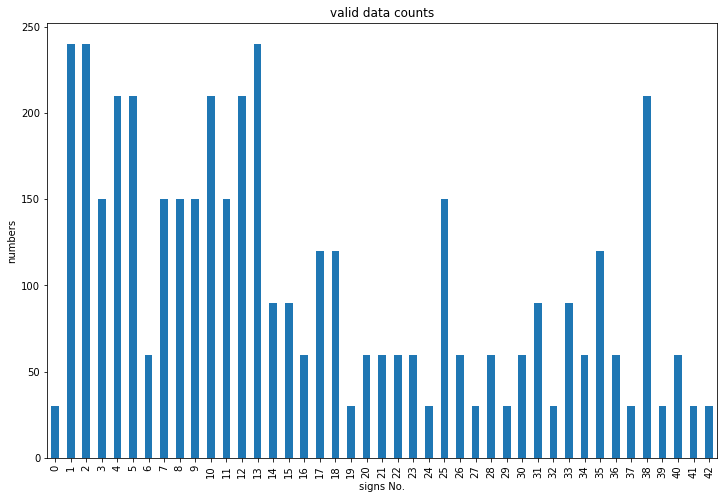

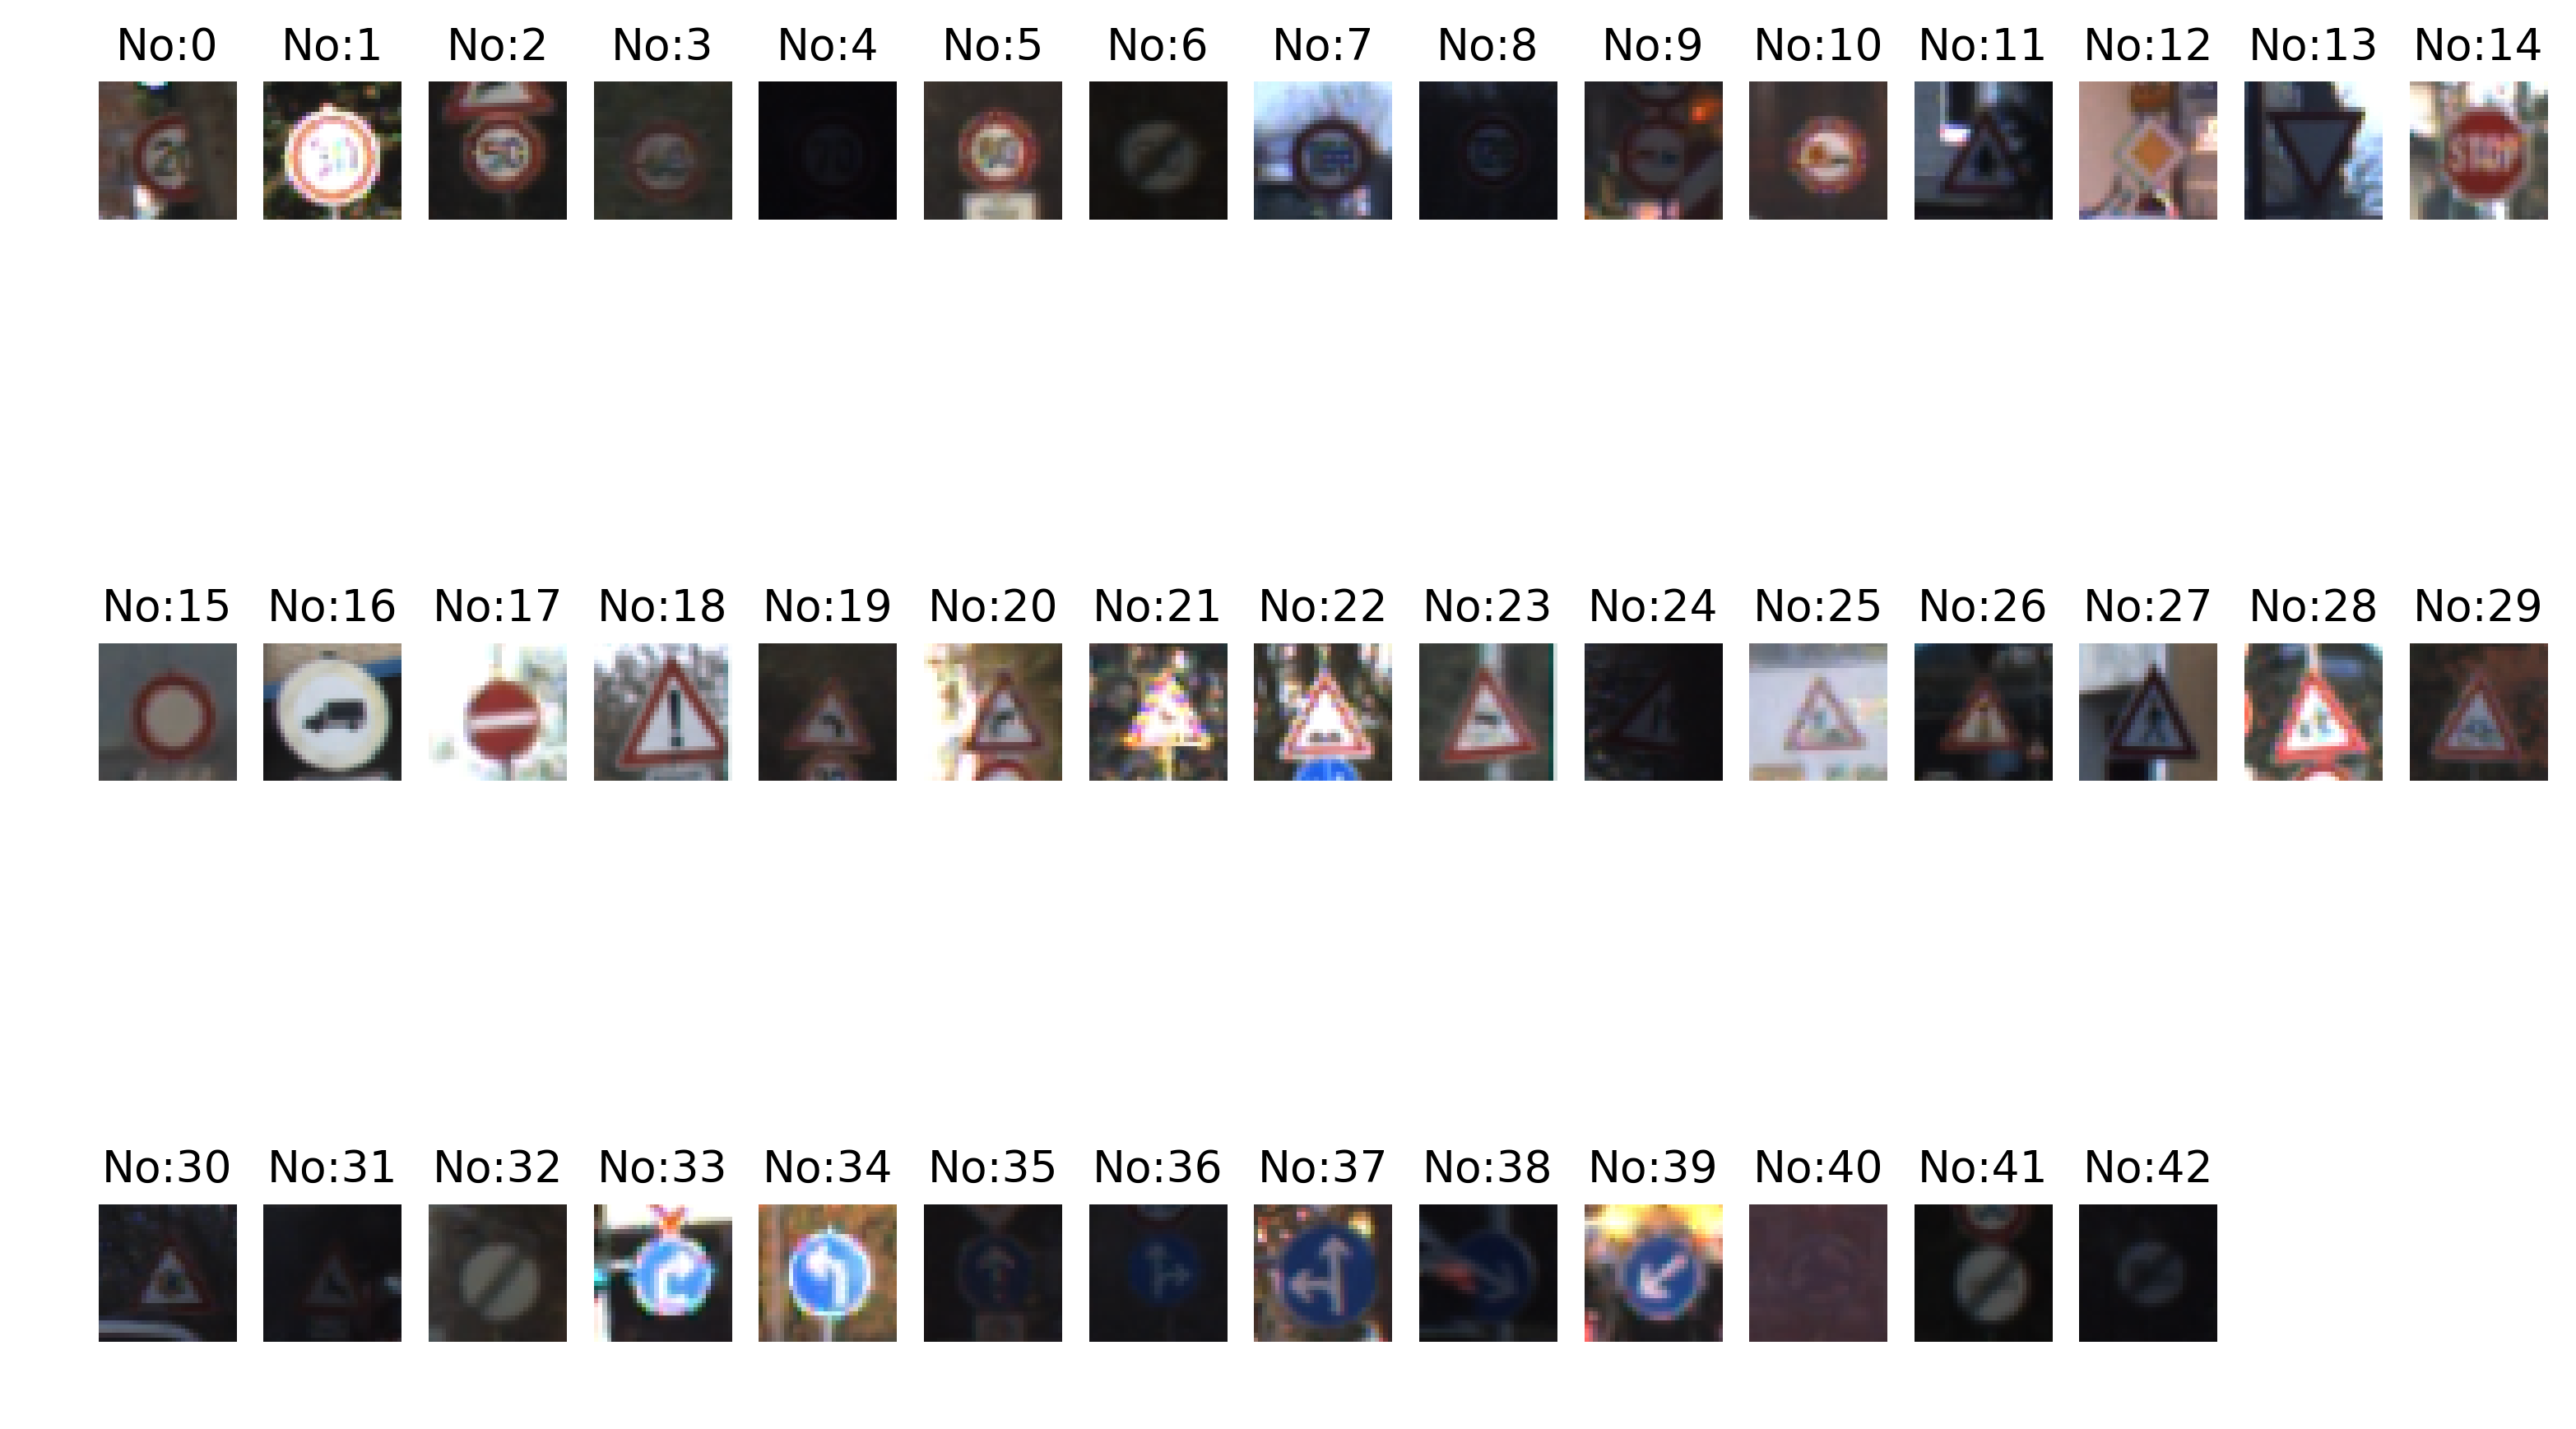

Label Counts: {0: 30, 1: 240, 2: 240, 3: 150, 4: 210, 5: 210, 6: 60, 7: 150, 8: 150, 9: 150, 10: 210, 11: 150, 12: 210, 13: 240, 14: 90, 15: 90, 16: 60, 17: 120, 18: 120, 19: 30, 20: 60, 21: 60, 22: 60, 23: 60, 24: 30, 25: 150, 26: 60, 27: 30, 28: 60, 29: 30, 30: 60, 31: 90, 32: 30, 33: 90, 34: 60, 35: 120, 36: 60, 37: 30, 38: 210, 39: 30, 40: 60, 41: 30, 42: 30}
Samples: 4410
First 20 Labels: [41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41]
Image - Shape: (32, 32, 3)


In [7]:
#visiulization for valid data
valid_counts = dict(zip(*np.unique(y_valid, return_counts=True)))
counts(valid_counts, "valid data counts")
image_visiulization(X_valid,y_valid)
#print count of each sign
print('Label Counts: {}'.format(valid_counts))
print('Samples: {}'.format(len(y_valid)))
print('First 20 Labels: {}'.format(y_valid[:20]))
print('Image - Shape: {}'.format(X_valid.shape[1:]))

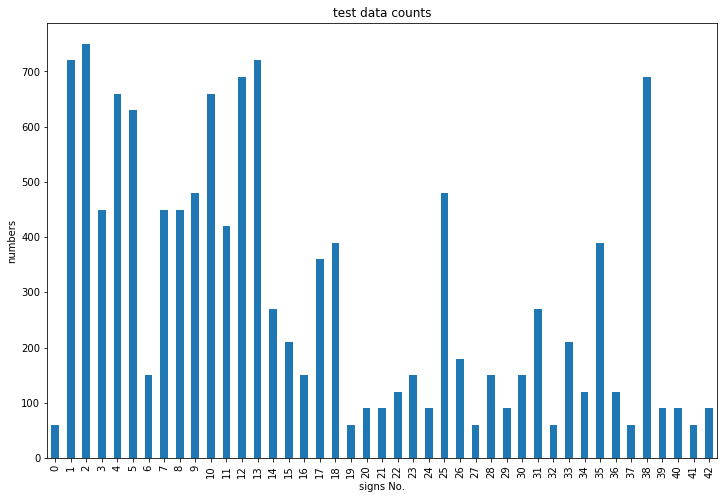

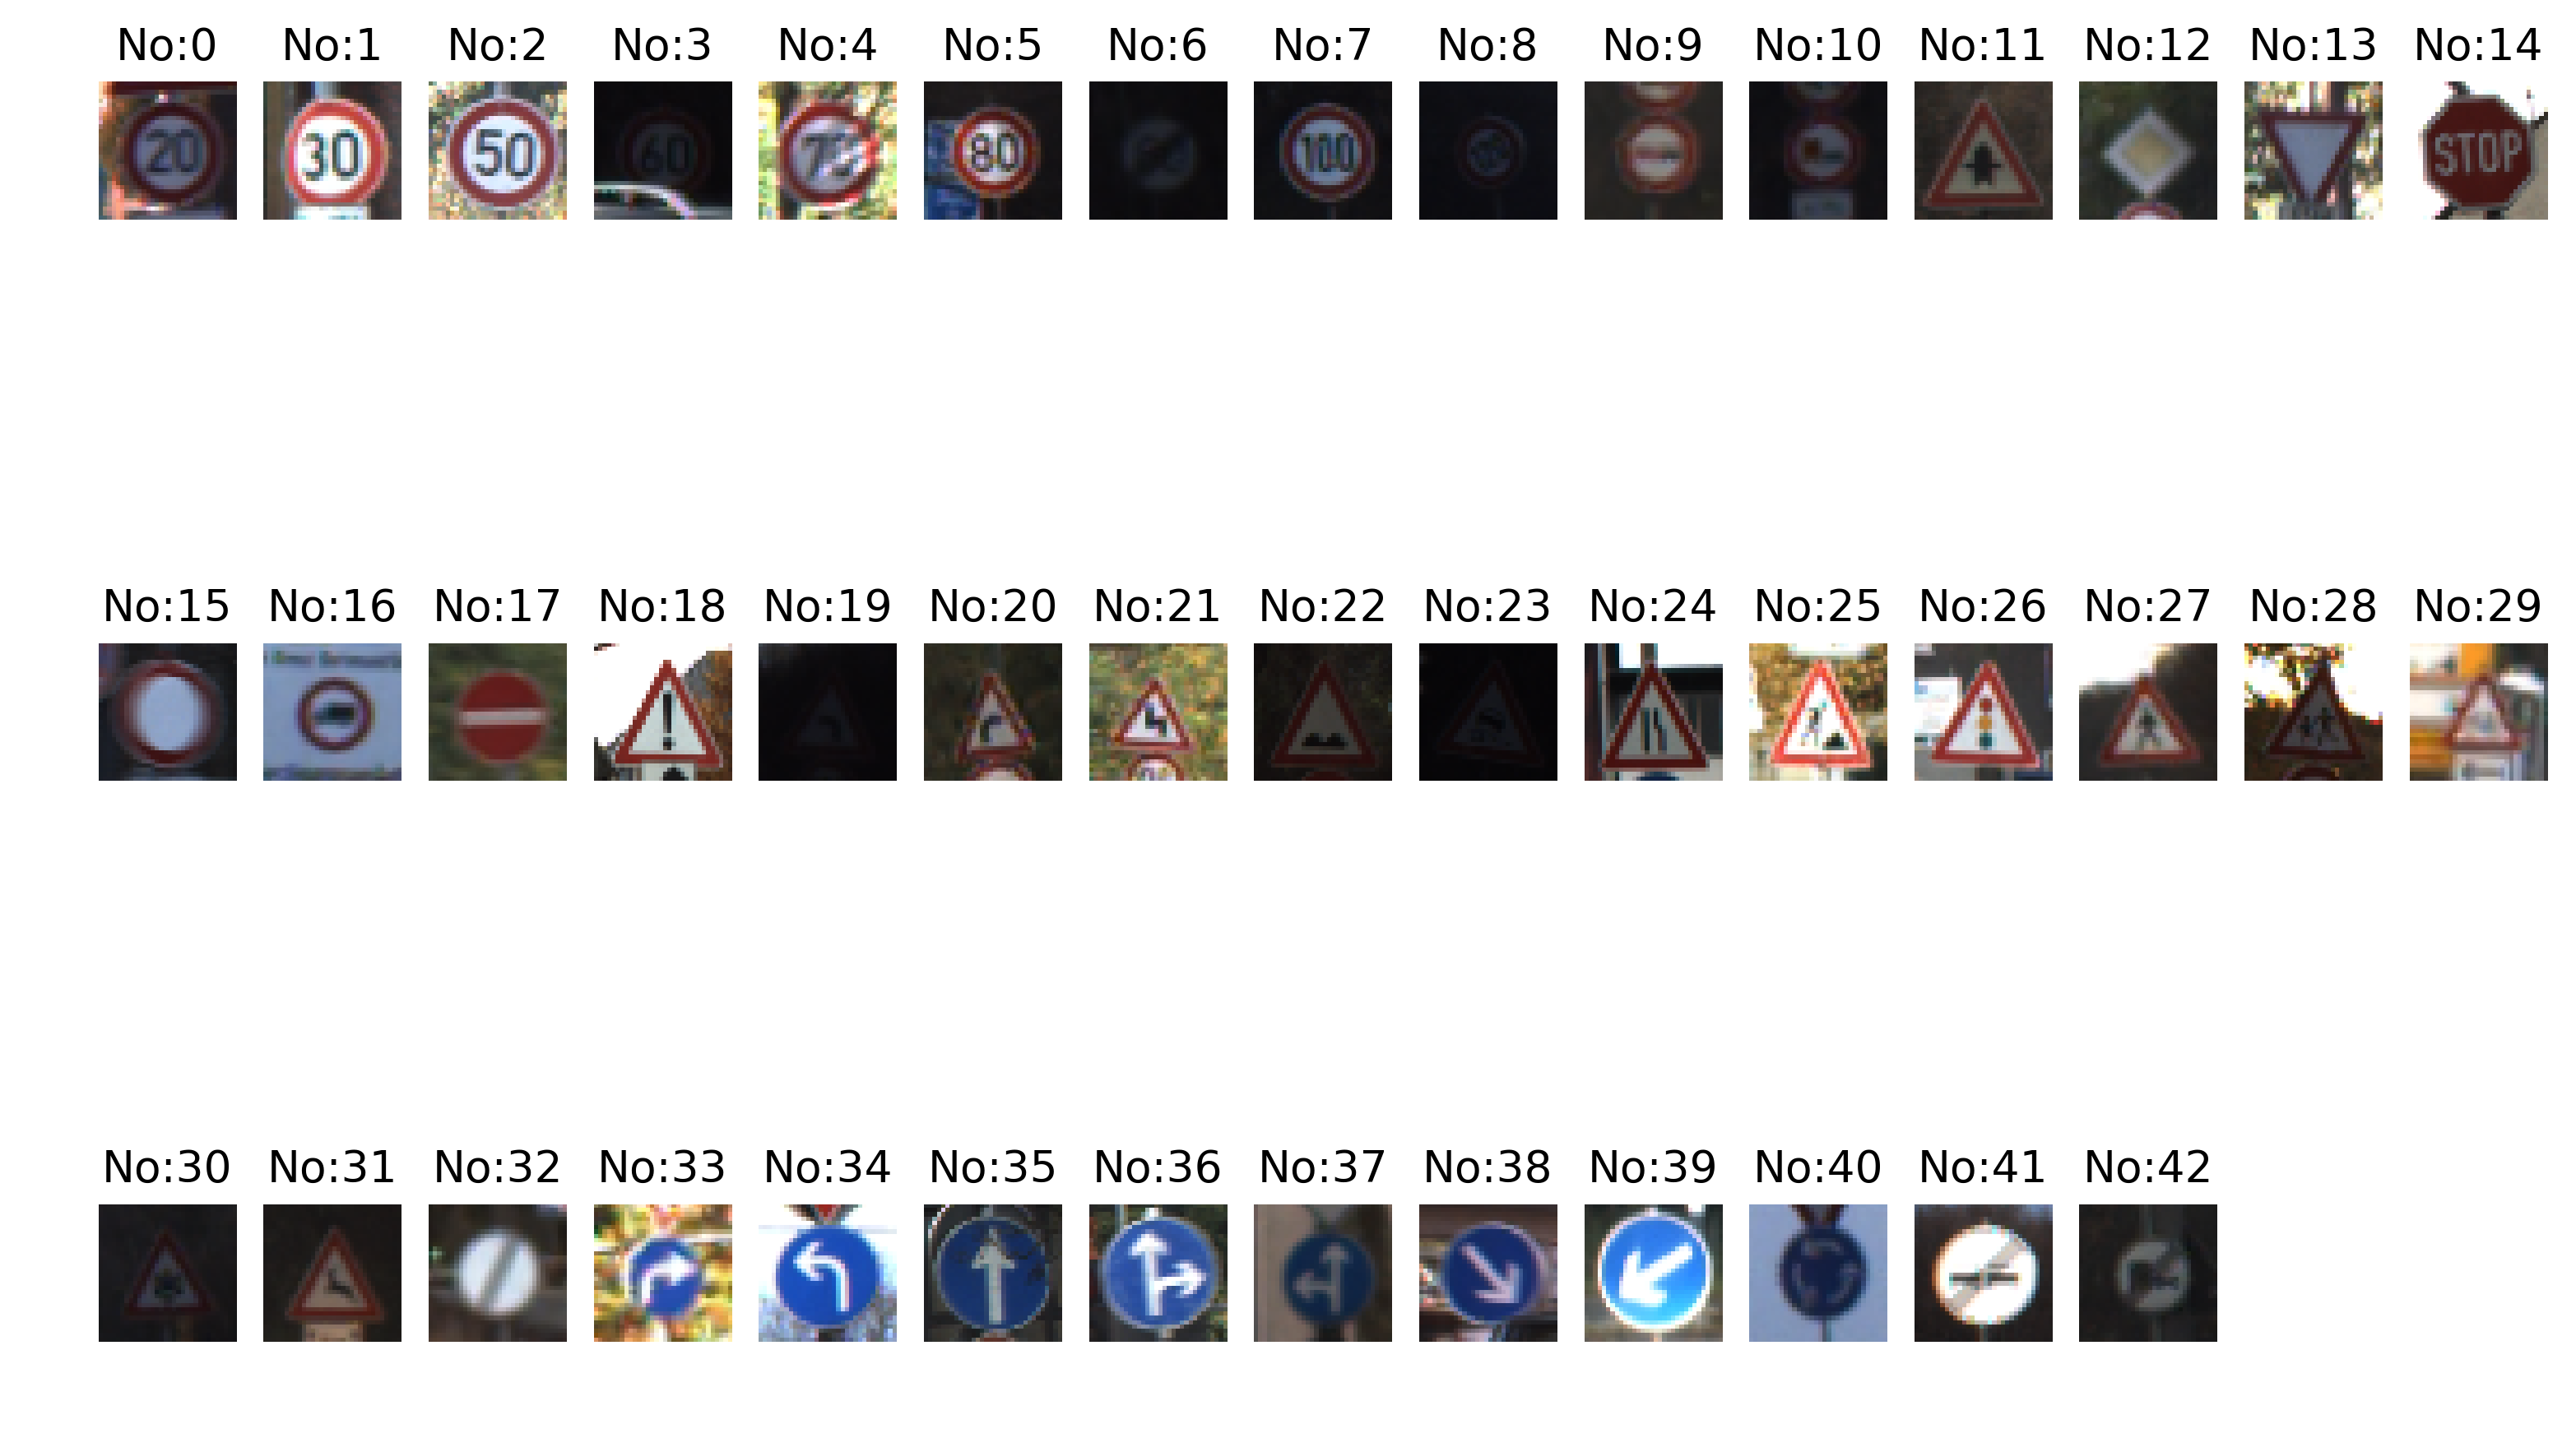

Label Counts: {0: 60, 1: 720, 2: 750, 3: 450, 4: 660, 5: 630, 6: 150, 7: 450, 8: 450, 9: 480, 10: 660, 11: 420, 12: 690, 13: 720, 14: 270, 15: 210, 16: 150, 17: 360, 18: 390, 19: 60, 20: 90, 21: 90, 22: 120, 23: 150, 24: 90, 25: 480, 26: 180, 27: 60, 28: 150, 29: 90, 30: 150, 31: 270, 32: 60, 33: 210, 34: 120, 35: 390, 36: 120, 37: 60, 38: 690, 39: 90, 40: 90, 41: 60, 42: 90}
Samples: 12630
First 20 Labels: [16  1 38 33 11 38 18 12 25 35 12  7 23  7  4  9 21 20 27 38]
Image - Shape: (32, 32, 3)


In [8]:
#visiulization for test data
test_counts = dict(zip(*np.unique(y_test, return_counts=True)))
counts(test_counts, "test data counts")
image_visiulization(X_test,y_test)
#print count of each sign
print('Label Counts: {}'.format(test_counts))
print('Samples: {}'.format(len(y_test)))
print('First 20 Labels: {}'.format(y_test[:20]))
print('Image - Shape: {}'.format(X_test.shape[1:]))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [10]:
# covert the image to grayscale
def grayscale(x):
    grayimg = []
    #number of samples,weidth, heigh, and channel
    n,w,h,c = x.shape[:]
    print(n)
    for i in range(n):
        grayscale = np.zeros((w,h,1))
        r, g, b = x[i,:,:,0], x[i,:,:,1], x[i,:,:,2]
        grayscale[:,:,0] = 0.2989 * r + 0.5870 * g + 0.1140 * b
        grayimg.append(grayscale)
    return np.array(grayimg)

In [11]:
# normalize the input image from 0 to 1
def normalize(x):
    normalize = np.array(x/255)
    return normalize

In [12]:
#do image histogram intensity here
def img_hist_intensity(x, y):
    #after that, we have double size training data than before
    from skimage import data,exposure
    n,w,h,c = x.shape[:]
    histimg = x.tolist()
    labelimg = y.tolist()
    for i in range(n):
        img1=exposure.equalize_hist(x[i,:,:,:])
        histimg.append(img1)
        labelimg.append(y[i])
    histimg = np.array(histimg)
    labelimg = np.array(labelimg)
    print(histimg.shape, labelimg.shape)
    return histimg, labelimg

In [13]:
#add gaussian noise here
def gaussian_noise(x, y):
    pass

In [14]:
# one-hot-encode, the traffic data has 43 unique classes
def one_hot_encode(y):
    labels = []
    for i in range(len(y)):
        enc_label = np.zeros(43)
        np.put(enc_label, y[i], 1)
        labels.append(enc_label)
    return np.array(labels)

In [15]:
#Randomize Data
#Explore the data, we can see those dataset need randomized 
def RandomizeData(X,y):
    from sklearn.utils import shuffle
    X, y = shuffle(X, y)
    return X, y

In [16]:
#Preprocess the dataset, for both train, valid and test data
#the step here is:
#1:convert to gray image
# 1.5 and 1.9 only works for training data, not used in our valid and test data.
#1.5: do image histogram intensity here, and now we have more training dataset here.
#1.9: we consider add gaussian noise to each training images, then we can have more data than before
#2:normalize the data from 0 to 1
#3:one hot encode for labels data
#4:randomize the dataset
#train data
features_train = grayscale(X_train)
features_train, y_train = img_hist_intensity(features_train, y_train)
features_train = normalize(features_train)
labels_train = one_hot_encode(y_train)
print(features_train.shape, labels_train.shape)
features_train, labels_train = RandomizeData(features_train, labels_train)
# valid data
features_valid = grayscale(X_valid)
#features_valid, y_valid = img_hist_intensity(features_valid, y_valid)
features_valid = normalize(features_valid)
labels_valid = one_hot_encode(y_valid)
print(features_valid.shape, labels_valid.shape)
features_valid, labels_valid = RandomizeData(features_valid, labels_valid)
#test data
features_test = grayscale(X_test)
#features_test, y_test = img_hist_intensity(features_test, y_test)
features_test = normalize(features_test)
labels_test = one_hot_encode(y_test)
print(features_test.shape, labels_test.shape)
features_test, labels_test = RandomizeData(features_test, labels_test)

34799


/home/walter/.local/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


(69598, 32, 32, 1) (69598,)
(69598, 32, 32, 1) (69598, 43)
4410
(4410, 32, 32, 1) (4410, 43)
12630
(12630, 32, 32, 1) (12630, 43)


### Model Architecture

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
#some code show as below is from my deep learning nanodegree foundation project2(Image classification for CIFAR-10).

In [18]:
import tensorflow as tf
# some basical function
def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    #the format here we use is N,H,W,C,[batch, in_height, in_weight, in_channel]
    H,W,C = image_shape
    return tf.placeholder(tf.float32, (None, H, W, C), name = "x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    return tf.placeholder(tf.float32, (None, n_classes), name = "y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder(tf.float32, name = "keep_prob")

In [19]:
# traditional convolution layer -> activation function -> pooling layer structure
def conv2d_pool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, padding = 'SAME', name = None):
    """
    Apply convolution then pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    :param padding:default is 'SAME', also can set as 'VALID'
    :Param pooling:two types, "average pool","max pool"
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    #get convolution kernel size
    conv_h,conv_w = conv_ksize
    #get the output depth 
    output_depth = conv_num_outputs
    #get [B,H,W,C] size, in_batch, in_height, in_weight, & in_depth
    in_b, in_h, in_w, in_depth = x_tensor.get_shape().as_list()
    #get weights
    mu = 0.0
    sigma = 0.1
    F_W = tf.Variable(tf.truncated_normal([int(conv_h), int(conv_w), int(in_depth), int(output_depth)],mean = mu, stddev = sigma))
    #get bias
    F_B = tf.Variable(tf.zeros(int(output_depth)))
    #convolution operation(do linear operation here)
    s_h,s_w = conv_strides
    #padding = 'SAME'
    conv = tf.nn.conv2d(x_tensor, F_W, [1, int(s_h), int(s_w), 1], padding, name = name) + F_B
    conv = tf.nn.relu(conv)
    pool_h, pool_w = pool_ksize
    pool_h_s,pool_w_s = pool_strides
    conv = tf.nn.max_pool(conv, [1, pool_h, pool_w, 1],[1, pool_h_s, pool_w_s, 1],padding)
    return conv

In [20]:
# other CNN architecture


In [21]:
# flatten layer
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    in_b, in_h, in_w, in_depth = x_tensor.get_shape().as_list()
    fc = tf.reshape(x_tensor, [-1, int(in_h)*int(in_w)*int(in_depth)])
    return fc


In [22]:
# fully connected layer
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    mu = 0.0
    sigma = 0.1
    input_dim = x_tensor.get_shape().as_list()[1]
    fc_W = tf.Variable(tf.truncated_normal(shape=(input_dim, num_outputs), mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(num_outputs))
    fc = tf.matmul(x_tensor, fc_W) + fc_b
    fc = tf.nn.relu(fc)
    return fc

In [23]:
# final output layer
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    input_dim = x_tensor.get_shape().as_list()[1]
    mu = 0.0
    sigma = 0.1
    fc_W = tf.Variable(tf.truncated_normal(shape=(input_dim, num_outputs), mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(num_outputs))
    logits = tf.add(tf.matmul(x_tensor, fc_W) ,fc_b)
    return logits


In [24]:
#This is our network architecture
#Simple experiment network is LeNet.later we will change it to other arcghitecture
def net_architecture(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    """
    #Simple LeNet structure
    #Hits,
    #conv2d_pool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, padding)
    #Convolution2d_maxpooling, Conv_1
    conv_1 = conv2d_pool(x,6,[5,5],[1,1],[2,2],[2,2],padding = 'VALID')
    #dropout layer
    conv_1 = tf.nn.dropout(conv_1, keep_prob=keep_prob )
    #Convolution2d_maxpooling, Conv_2
    conv_2 = conv2d_pool(conv_1,16,[5,5],[1,1],[2,2],[2,2],padding = 'VALID')
    #dropout layer
    conv_2 = tf.nn.dropout(conv_2, keep_prob = keep_prob )
    #Flatten
    flat = flatten(conv_2)
    #Fully Connected layer, fully_conn_1
    fully_conn_1 = fully_conn(flat, 320)
    #dropout layer
    fully_conn_1 = tf.nn.dropout(fully_conn_1, keep_prob = keep_prob )
    #Fully Connected layer, fully_conn_2
    fully_conn_2 = fully_conn(fully_conn_1, 320)
    #dropout layer
    fully_conn_2 = tf.nn.dropout(fully_conn_2, keep_prob = keep_prob )
    #output layer, logits
    logits = output(fully_conn_2, 43)
    return logits
    """
    #"""
    #My Nets Architecture(its works better than LeNet)
    conv_1 = conv2d_pool(x,32,[5,5],[1,1],[2,2],[2,2], name = "conv_1")
    #print(conv_1.shape)
    conv_1 = tf.nn.dropout(conv_1, keep_prob = keep_prob)
    conv_2 = conv2d_pool(conv_1, 64, [3,3],[1,1],[2,2],[2,2], name = "conv_2")
    #print(conv_2.shape)
    conv_2 = tf.nn.dropout(conv_2, keep_prob = keep_prob)
    conv_3 = conv2d_pool(conv_2, 128,[3,3],[1,1],[2,2],[2,2], name = "conv_3")
    #print(conv_3.shape)
    conv_3 = tf.nn.dropout(conv_3, keep_prob = keep_prob)
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    fc0 = flatten(conv_3)
    #print(keep_prob)
    #fc0 = tf.nn.dropout(fc0, keep_prob = keep_prob)
    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    fc1 = fully_conn(fc0,512)
    fc1 = tf.nn.dropout(fc1, keep_prob = keep_prob)
    fc2 = fully_conn(fc1, 256)
    fc2 = tf.nn.dropout(fc2, keep_prob = keep_prob)
    #fc3 = fully_conn(fc2, 256)
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    outputs = output(fc2, 43)
    # TODO: return output
    return outputs
    #"""


In [25]:
# to create our neural network pipeline
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()
    
#Input
x = neural_net_image_input((32,32,1))
y = neural_net_label_input(43)
keep_prob = neural_net_keep_prob_input()
    
#Model
logits = net_architecture(x, keep_prob)
    
#Name logits Tensor, 
logits = tf.identity(logits, name='logits')
    
#Loss and Optimizer set, here we use adam methods.
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)
    
#Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [26]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [27]:
# optimization function
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of image data
    : label_batch: Batch of label data
    """
    train_feed_dict = {
                x: feature_batch,
                y: label_batch,
                keep_prob: keep_probability
                }
    session.run(optimizer, feed_dict = train_feed_dict)

In [28]:
# print Status
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    curr_loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob : 1.0})
    valid_acc = session.run(accuracy, feed_dict = {x: features_valid,y: labels_valid, keep_prob : 1.0})
    print("current session loss: {:.4f}, valid accuracy is: {:.4f}".format(curr_loss, valid_acc))

In [29]:
# Hyperparameters
epochs = 20
batch_size = 128
keep_probability = 0.7
save_model_path = './classification'

In [30]:
# Train the nets
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(epochs):
        #X_train, y_train = shuffle(features_train, y_train)
        for offset in range(0, num_examples,batch_size):
            end = offset + batch_size
            batch_x, batch_y = features_train[offset:end], labels_train[offset:end]
            train_neural_network(sess, optimizer, keep_probability, batch_x, batch_y)
        print('Epoch {:>2} '.format(i + 1), end='')
        print_stats(sess, batch_x, batch_y, cost, accuracy)
        
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...

Epoch  1 current session loss: 3.1687, valid accuracy is: 0.2186
Epoch  2 current session loss: 2.3159, valid accuracy is: 0.5317
Epoch  3 current session loss: 1.7147, valid accuracy is: 0.7569
Epoch  4 current session loss: 0.9818, valid accuracy is: 0.8306
Epoch  5 current session loss: 0.6708, valid accuracy is: 0.8662
Epoch  6 current session loss: 0.5055, valid accuracy is: 0.8812
Epoch  7 current session loss: 0.3871, valid accuracy is: 0.9109
Epoch  8 current session loss: 0.3398, valid accuracy is: 0.9374
Epoch  9 current session loss: 0.2762, valid accuracy is: 0.9447
Epoch 10 current session loss: 0.2296, valid accuracy is: 0.9429
Epoch 11 current session loss: 0.1967, valid accuracy is: 0.9522
Epoch 12 current session loss: 0.1843, valid accuracy is: 0.9465
Epoch 13 current session loss: 0.1481, valid accuracy is: 0.9442
Epoch 14 current session loss: 0.1214, valid accuracy is: 0.9510
Epoch 15 current session loss: 0.1136, valid accuracy is: 0.9413
Epoch 16 cur

In [32]:
#using our trained model works for test data
#set parameters here
import random
from sklearn.preprocessing import LabelBinarizer

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
save_model_path = './classification'
n_samples = 5
top_n_predictions = 3

In [33]:
def batch_features_labels(features, labels, batch_size):
    """
    The usage of this function is Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]

In [97]:
def display_image_predictions(features, labels, predictions, nrows = 5, n_predictions = 3):
    df = pd.read_csv("signnames.csv")
    names = []
    for i in range(df.shape[0]):
        names.append(df.iloc[i].SignName)
    #[names.append(df.iloc[i].SignName for i in range(df.shape[1]))]
    print(names)
    n_classes = 43
    label_names = names
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(n_classes))
    label_ids = label_binarizer.inverse_transform(np.array(labels))

    fig, axies = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15))
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = n_predictions
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions
    #print(features)
    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = label_names[label_id]
        #print(image_i, label_names[label_id])
        #print(feature.shape)
        #feature.reshape([-1,32])
        import scipy
        #feature = scipy.misc.fromimage(feature, 0)
        #print(feature.shape)
        img = np.asarray(feature * 255)
        #img = np.expand_dims(img, axis=0)
        #print(img.shape)
        axies[image_i][0].imshow(img[:,:,0], cmap='gray')
        axies[image_i][0].set_title(correct_name, fontsize = 7)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1], fontsize = 7)
        axies[image_i][1].set_xticks([0, 0.5, 1.0])

In [98]:
def test():
    """
    using our saved model to test dataset
    """
    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        # Load trained model here
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        #test model here
        for train_feature_batch, train_label_batch in batch_features_labels(features_test, labels_test, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))
        
        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(features_test, labels_test)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        display_image_predictions(random_test_features, random_test_labels, random_test_predictions)

Testing Accuracy: 0.9396747272424023

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by v

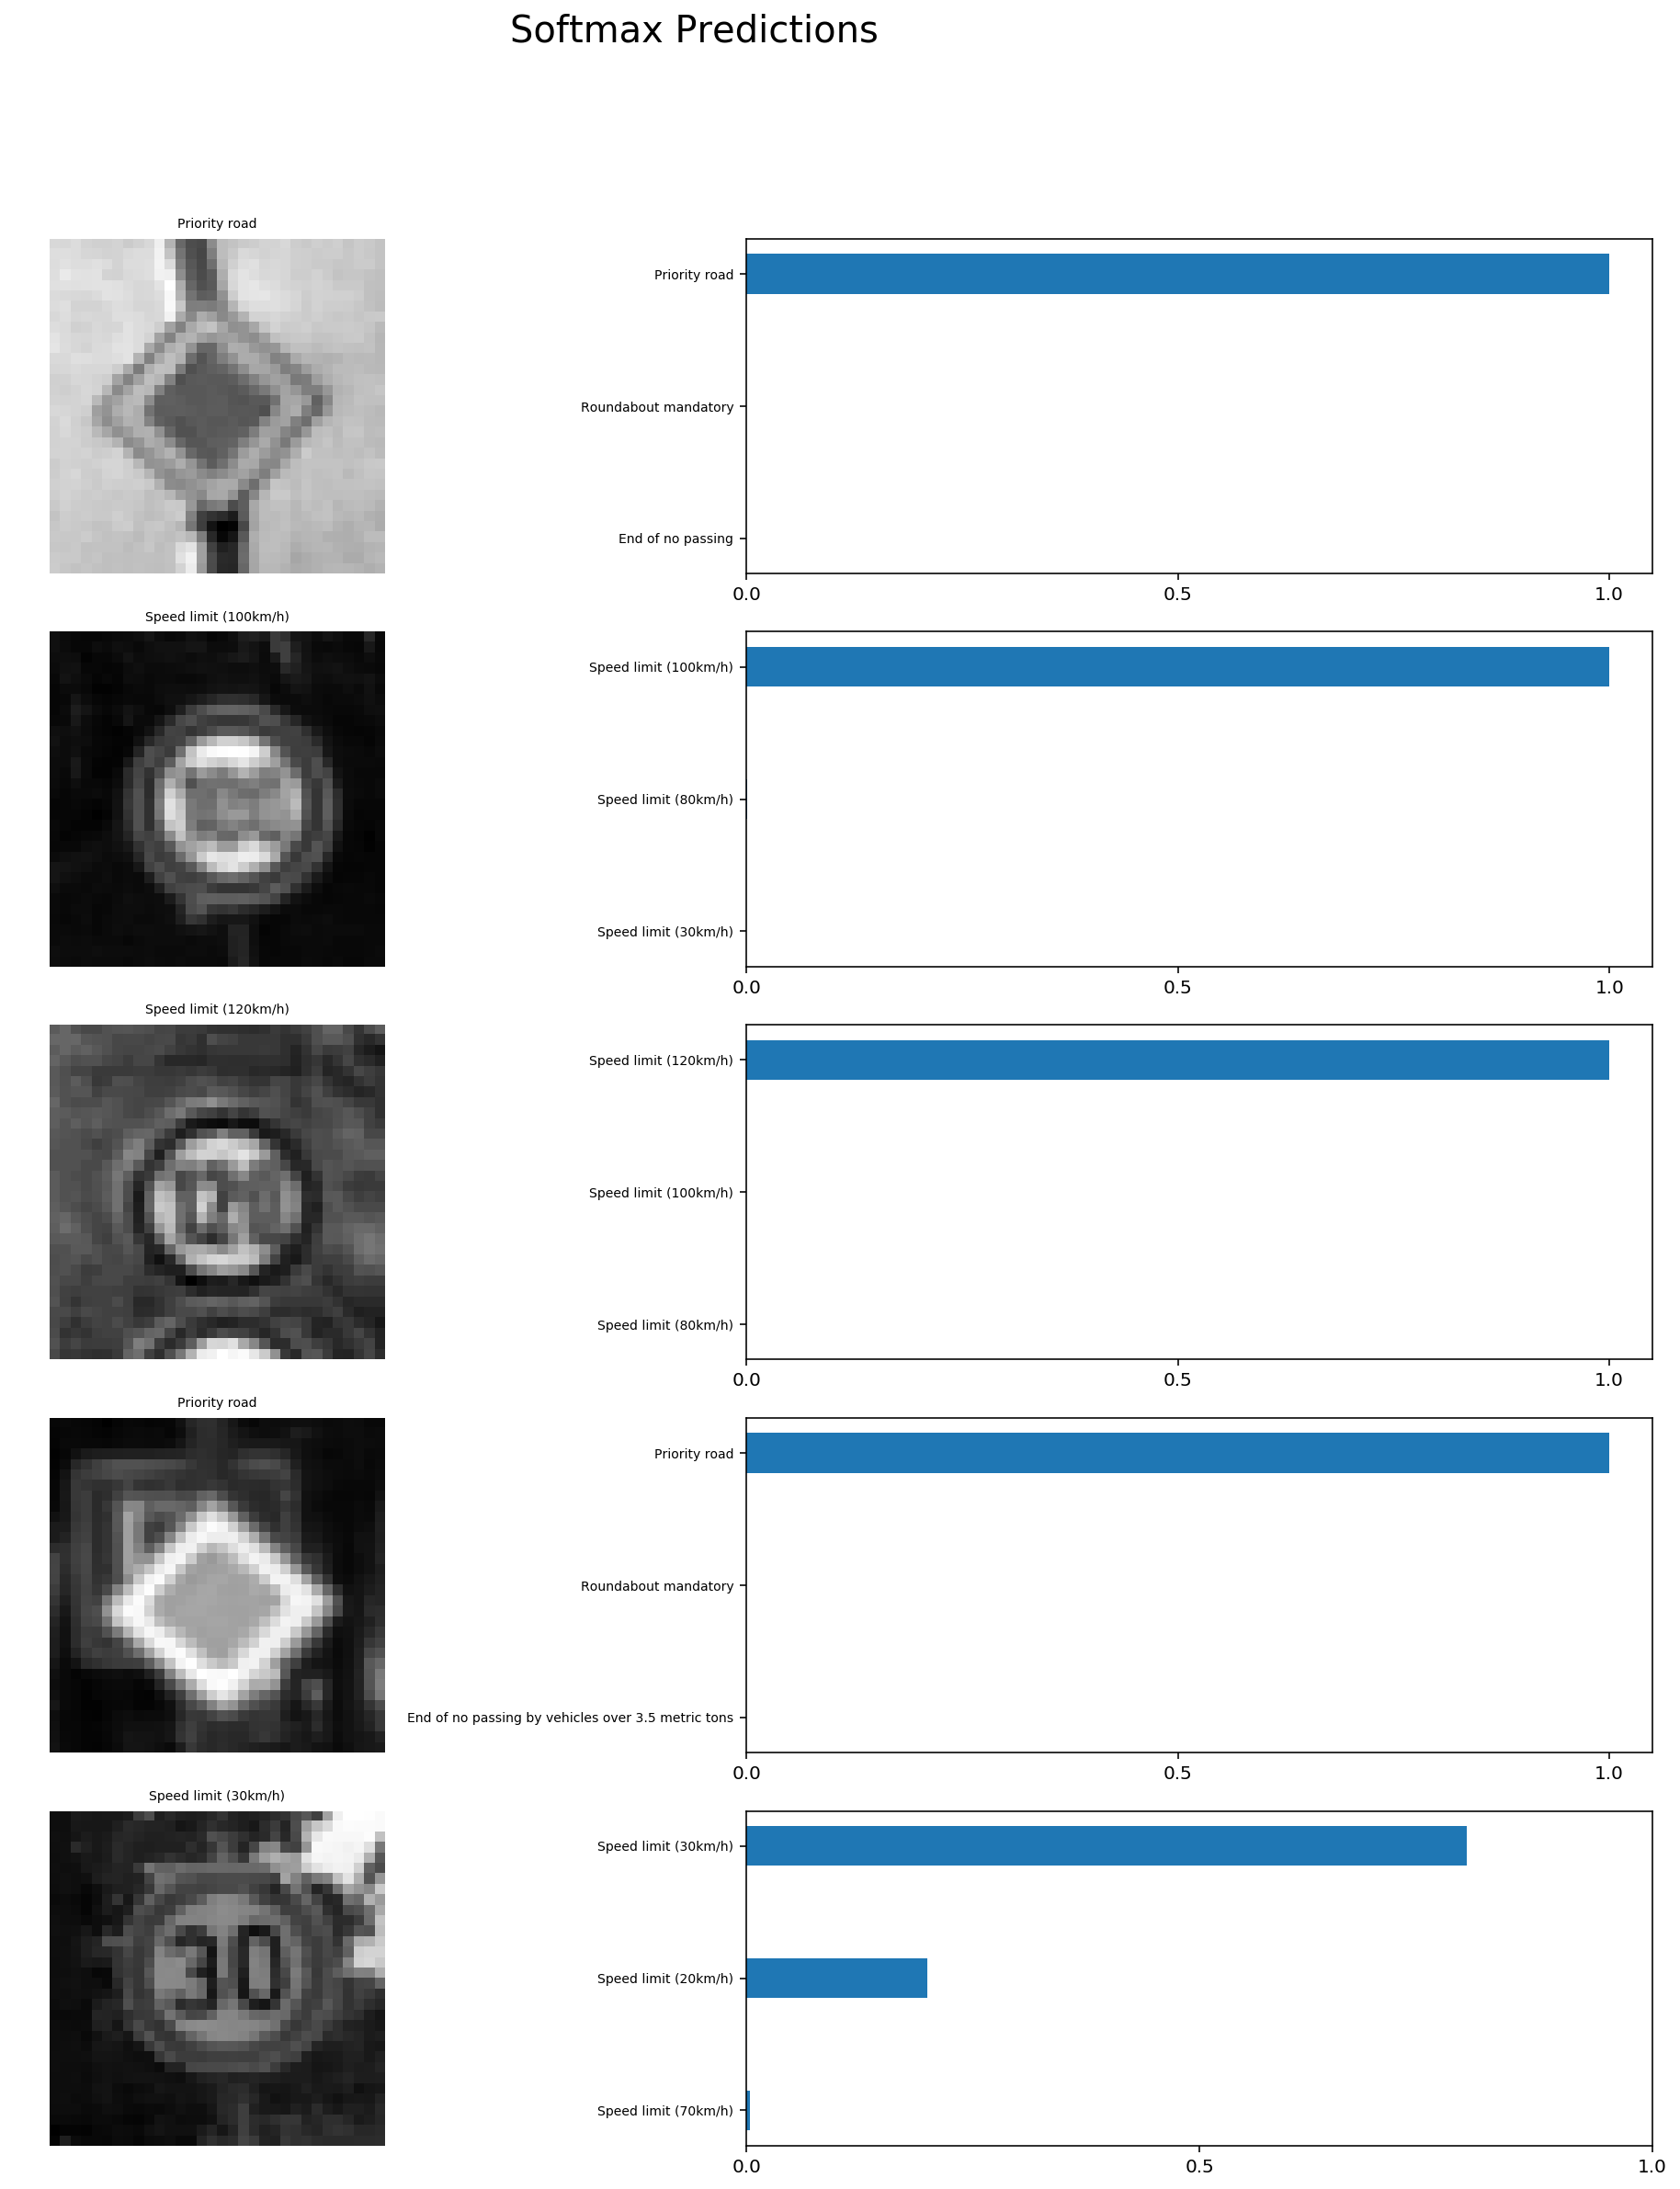

In [99]:
test()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [130]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
#load the images and set the label y for each input image
image_features_files = ["traffic_signs_0_.jpg","traffic_signs_1.jpg","traffic_signs_2.jpg","traffic_signs_3.jpg","traffic_signs_4.jpg","traffic_signs_5.jpg"]
df = pd.read_csv("signnames.csv")
names = []
for i in range(df.shape[0]):
    names.append(df.iloc[i].SignName)
image_labels = [names[37],names[18],names[17],names[3],names[25],names[14]]
img_mat = [37,18,17,3,25,14]

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


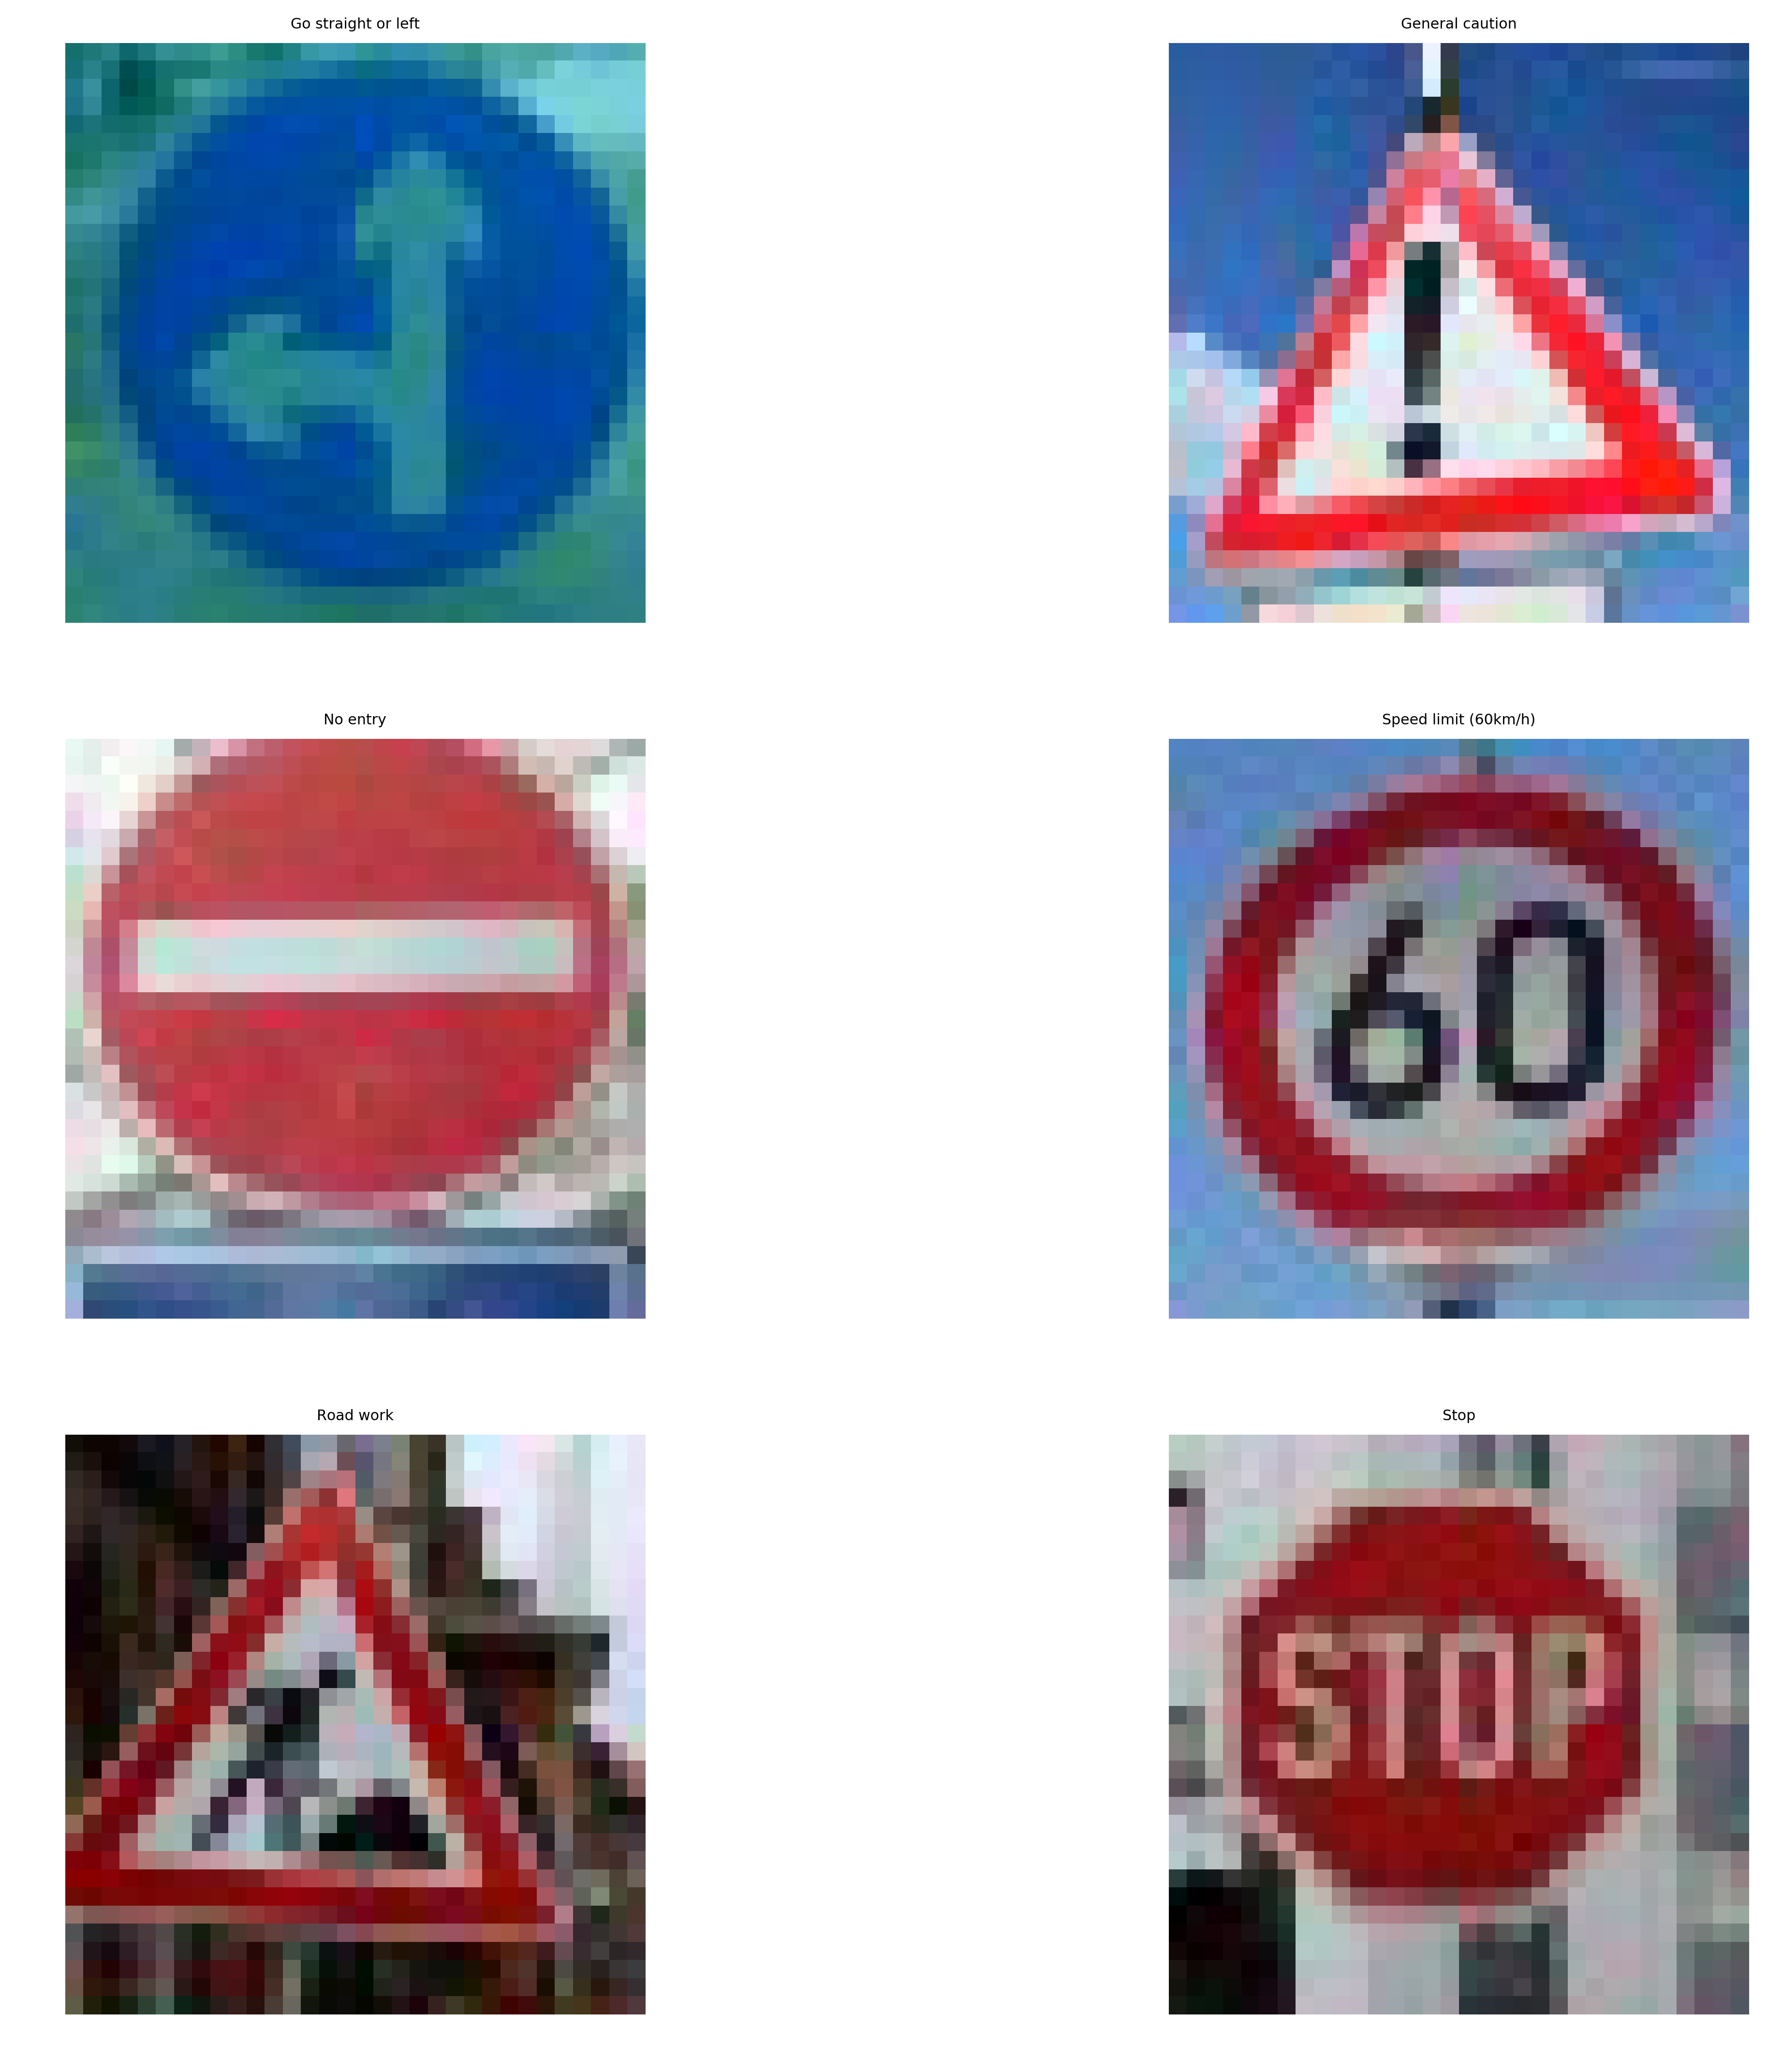

In [131]:
#display the images here
import cv2
from skimage import transform,data
from PIL import Image
import matplotlib.image as mpimg

address = "images_from_web/"
plt.figure(figsize = (15,15), dpi = 180)
# display the images and show the labels here
imgs = []
labs = []
for i in range(6):
    ax = plt.subplot(3,2,i+1)
    ax.axis('off')
    image = mpimg.imread(address+image_features_files[i]) 
    print(image.shape)
    #image = Image.open(address+image_features_files[i]).convert("L")
    image = transform.resize(image,(32,32))
    imgs.append(image)
    #print(image)
    ax.set_title("{0}".format(image_labels[i]),fontsize=6)
    labs.append(img_mat[i])
    ax.imshow(image) 
plt.show()

### Predict the Sign Type for Each Image

In [132]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [133]:
#pre-process the images with the same pre-processing pipeline here
#1.0 read images and create feature matrix x, and label matrix y
print(len(imgs))
#imgs = imgs.tolist()
imgs = np.array(imgs)
labs = np.array(labs)
print(imgs.shape, labs.shape)

6
(6, 32, 32, 3) (6,)


In [134]:
#2.0 doing pre-processing pipeline here
features_web = grayscale(imgs)
features_web = normalize(features_web)
labels_web = one_hot_encode(labs)
print(features_web.shape, labels_web.shape)

6
(6, 32, 32, 1) (6, 43)


In [135]:
#3.0 load pre-trained model and predict the results for each image
def web_test(top_n_predictions = 3, n_predictions = 3):
    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        # Load trained model here
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Print the results of input Samples
        #random_test_features, random_test_labels = tuple((list(zip(features_web, labels_web))))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: features_web, loaded_y: labels_web, loaded_keep_prob: 1.0})
        display_image_predictions(features_web, labels_web, random_test_predictions, nrows = 6, n_predictions = n_predictions)
        return random_test_predictions

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']


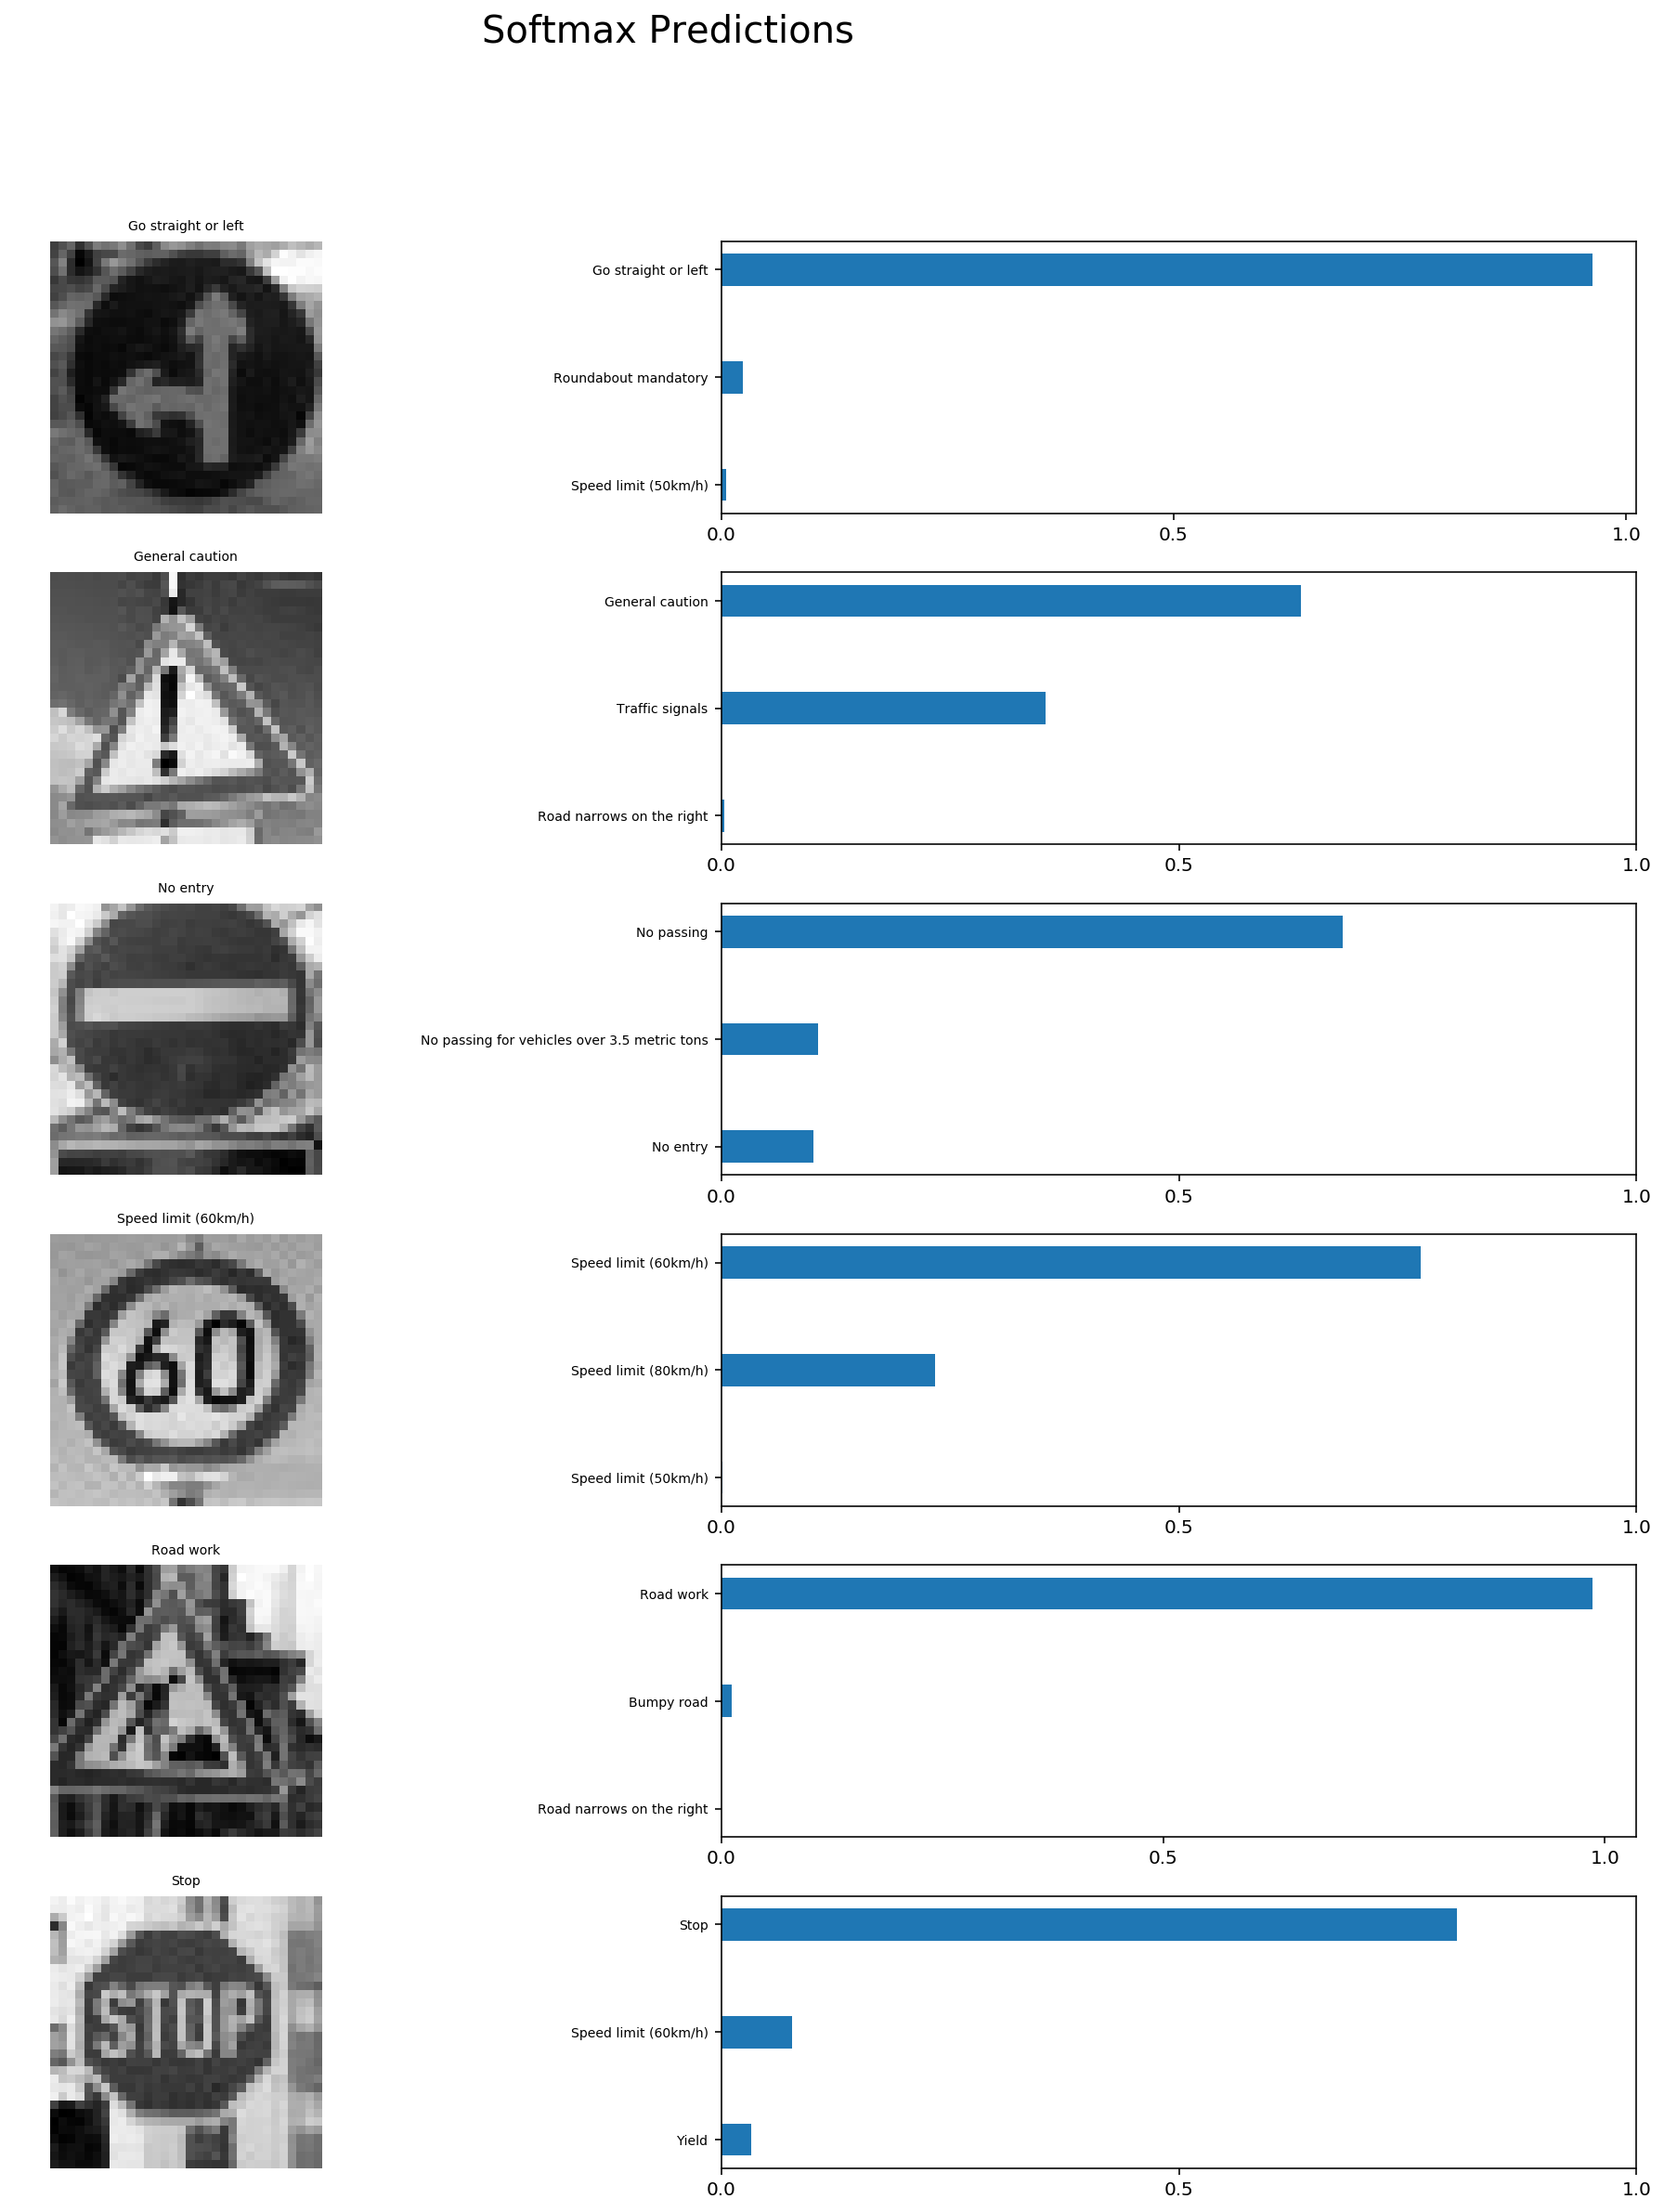

In [136]:
web_prediction = web_test()

### Analyze Performance

In [137]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [138]:
print(web_prediction)

TopKV2(values=array([[  9.63145375e-01,   2.36673057e-02,   5.48420567e-03],
       [  6.33475840e-01,   3.54219526e-01,   3.33895022e-03],
       [  6.78973377e-01,   1.05622150e-01,   1.01138167e-01],
       [  7.64319777e-01,   2.33451739e-01,   9.48376080e-04],
       [  9.86320913e-01,   1.23861982e-02,   5.18718385e-04],
       [  8.04050088e-01,   7.74233267e-02,   3.30498591e-02]], dtype=float32), indices=array([[37, 40,  2],
       [18, 26, 24],
       [ 9, 10, 17],
       [ 3,  5,  2],
       [25, 22, 24],
       [14,  3, 13]], dtype=int32))


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']


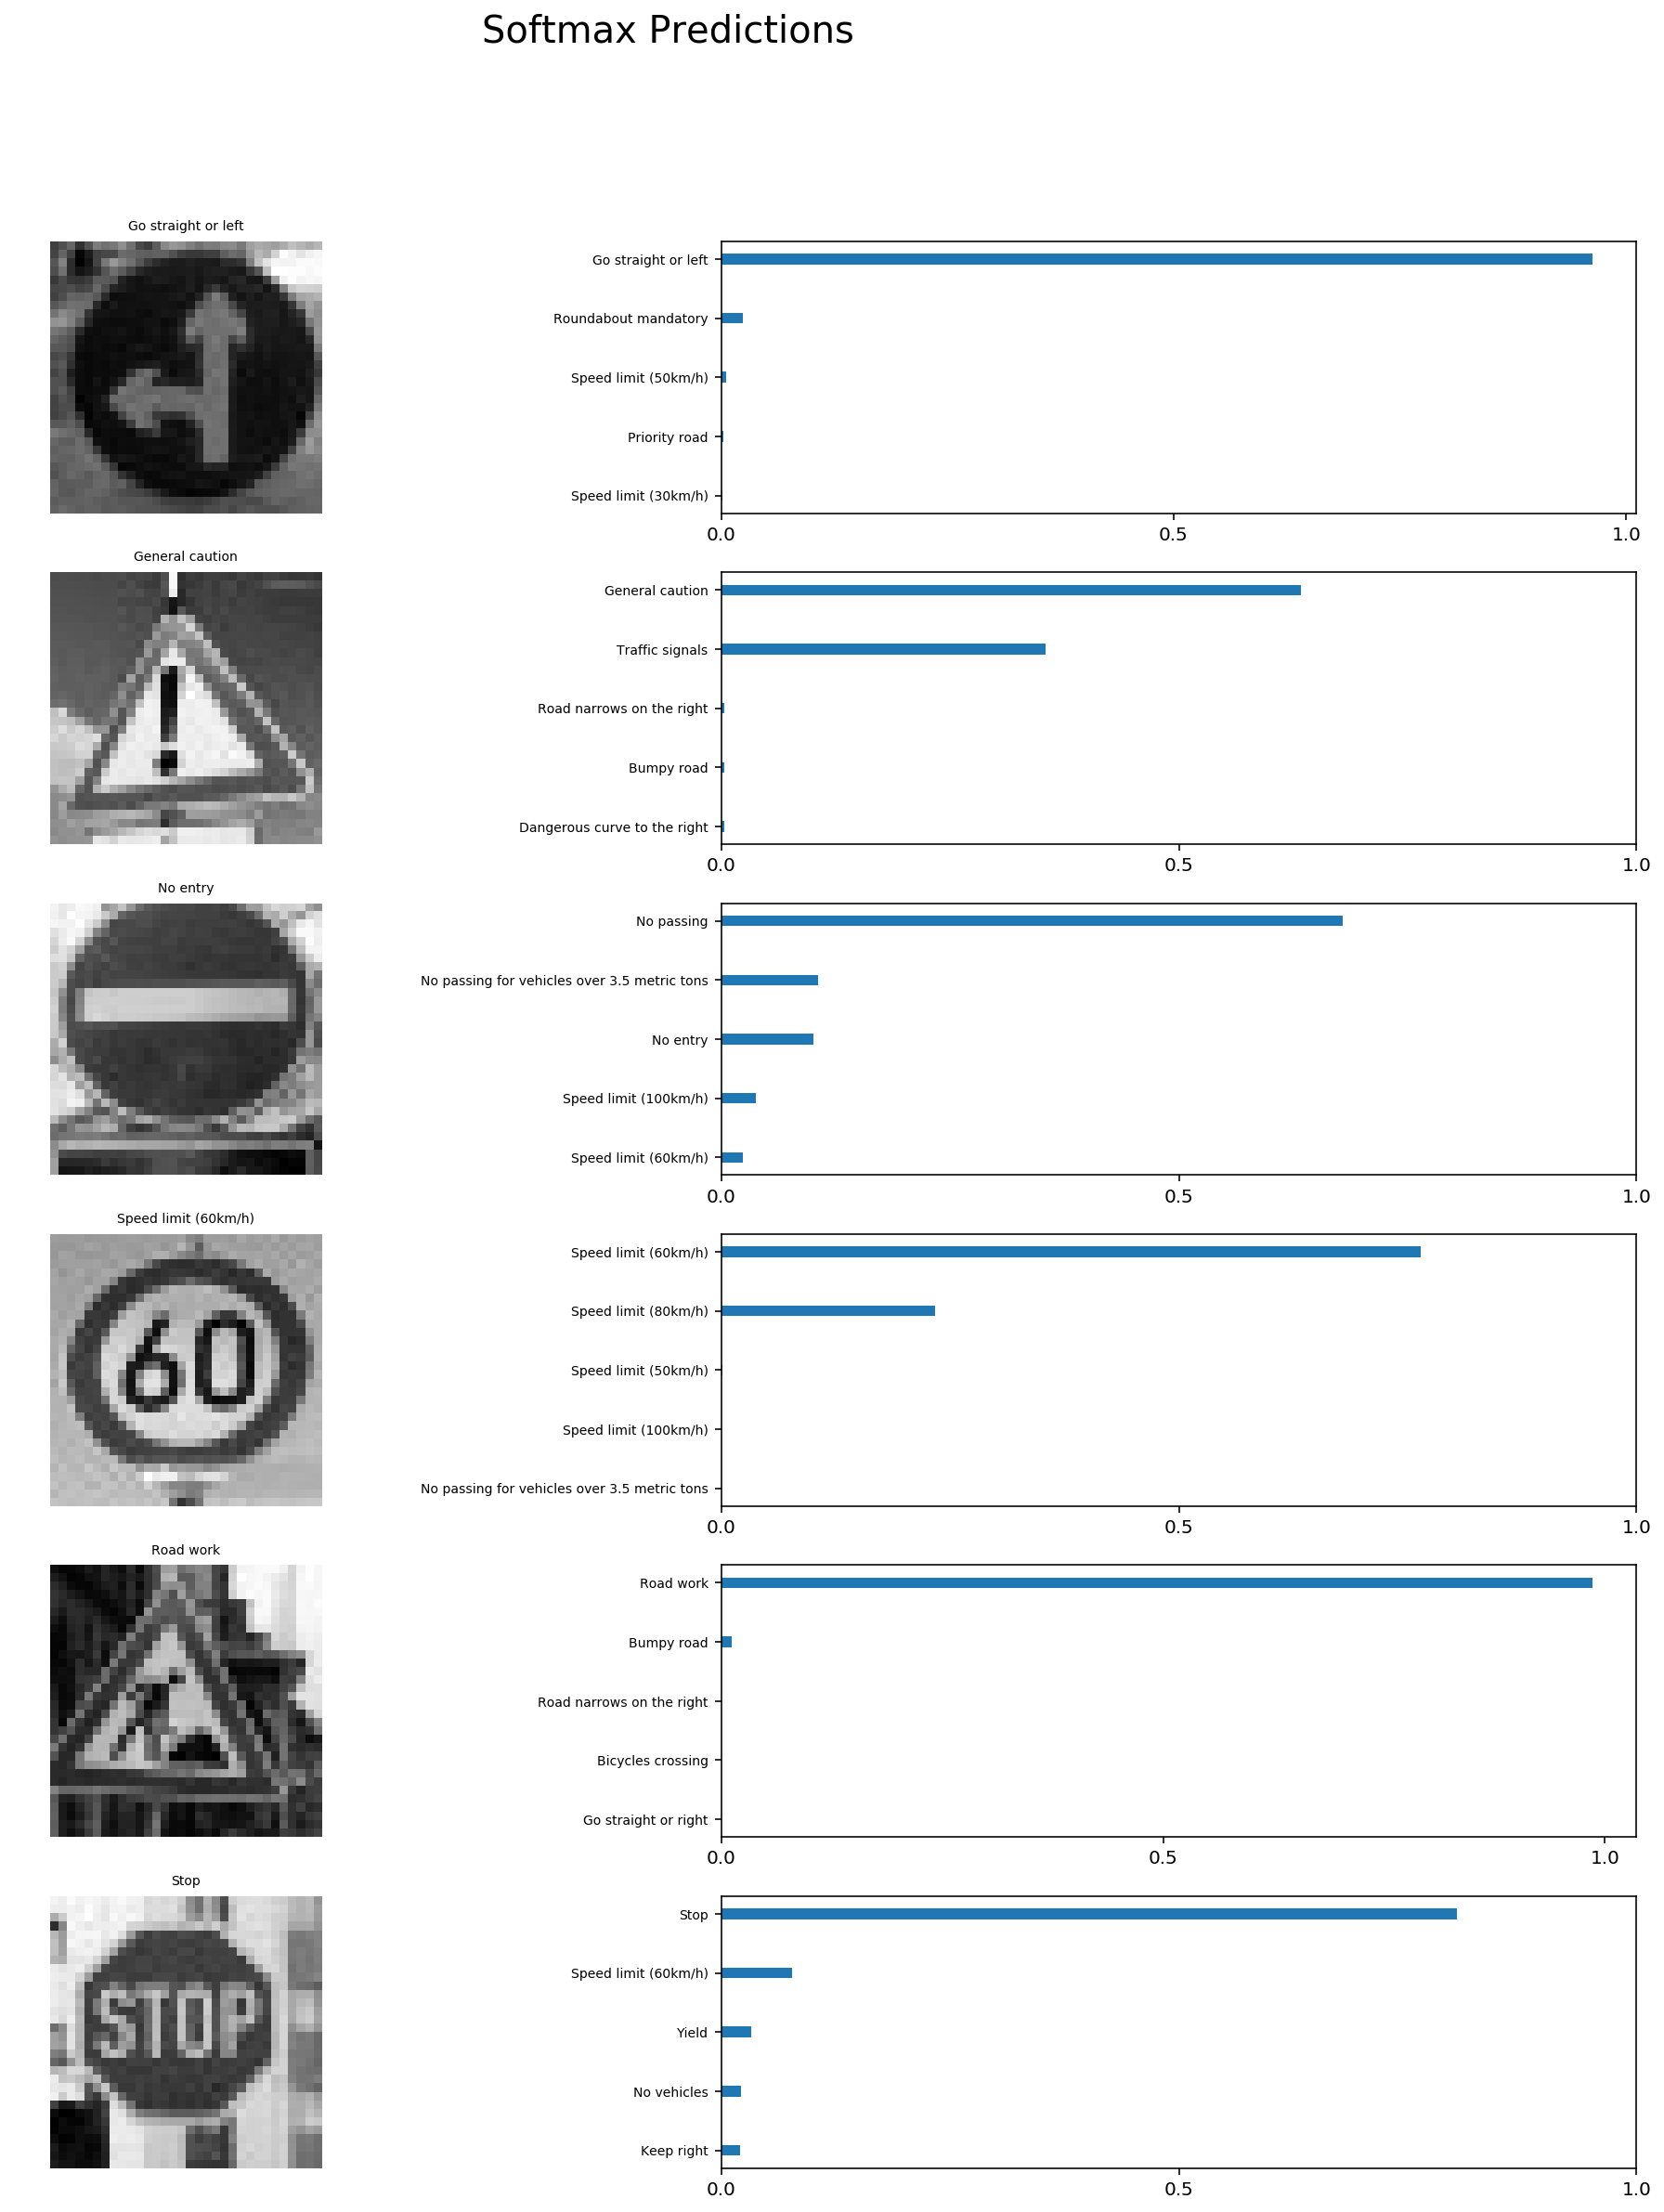

In [139]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
web_prediction = web_test(top_n_predictions = 5, n_predictions = 5)

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [140]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(sess,image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1, row = 6, column = 8):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    #sess = tf.get_default_session()
    #print(tf_activation)
    activation = tf_activation.eval(session=sess,feed_dict={loaded_x : image_input, loaded_keep_prob : 1.0})
    #sess = tf.Session()
    #activation = sess.run(tf_activation, feed_dict = {x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(row,column, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

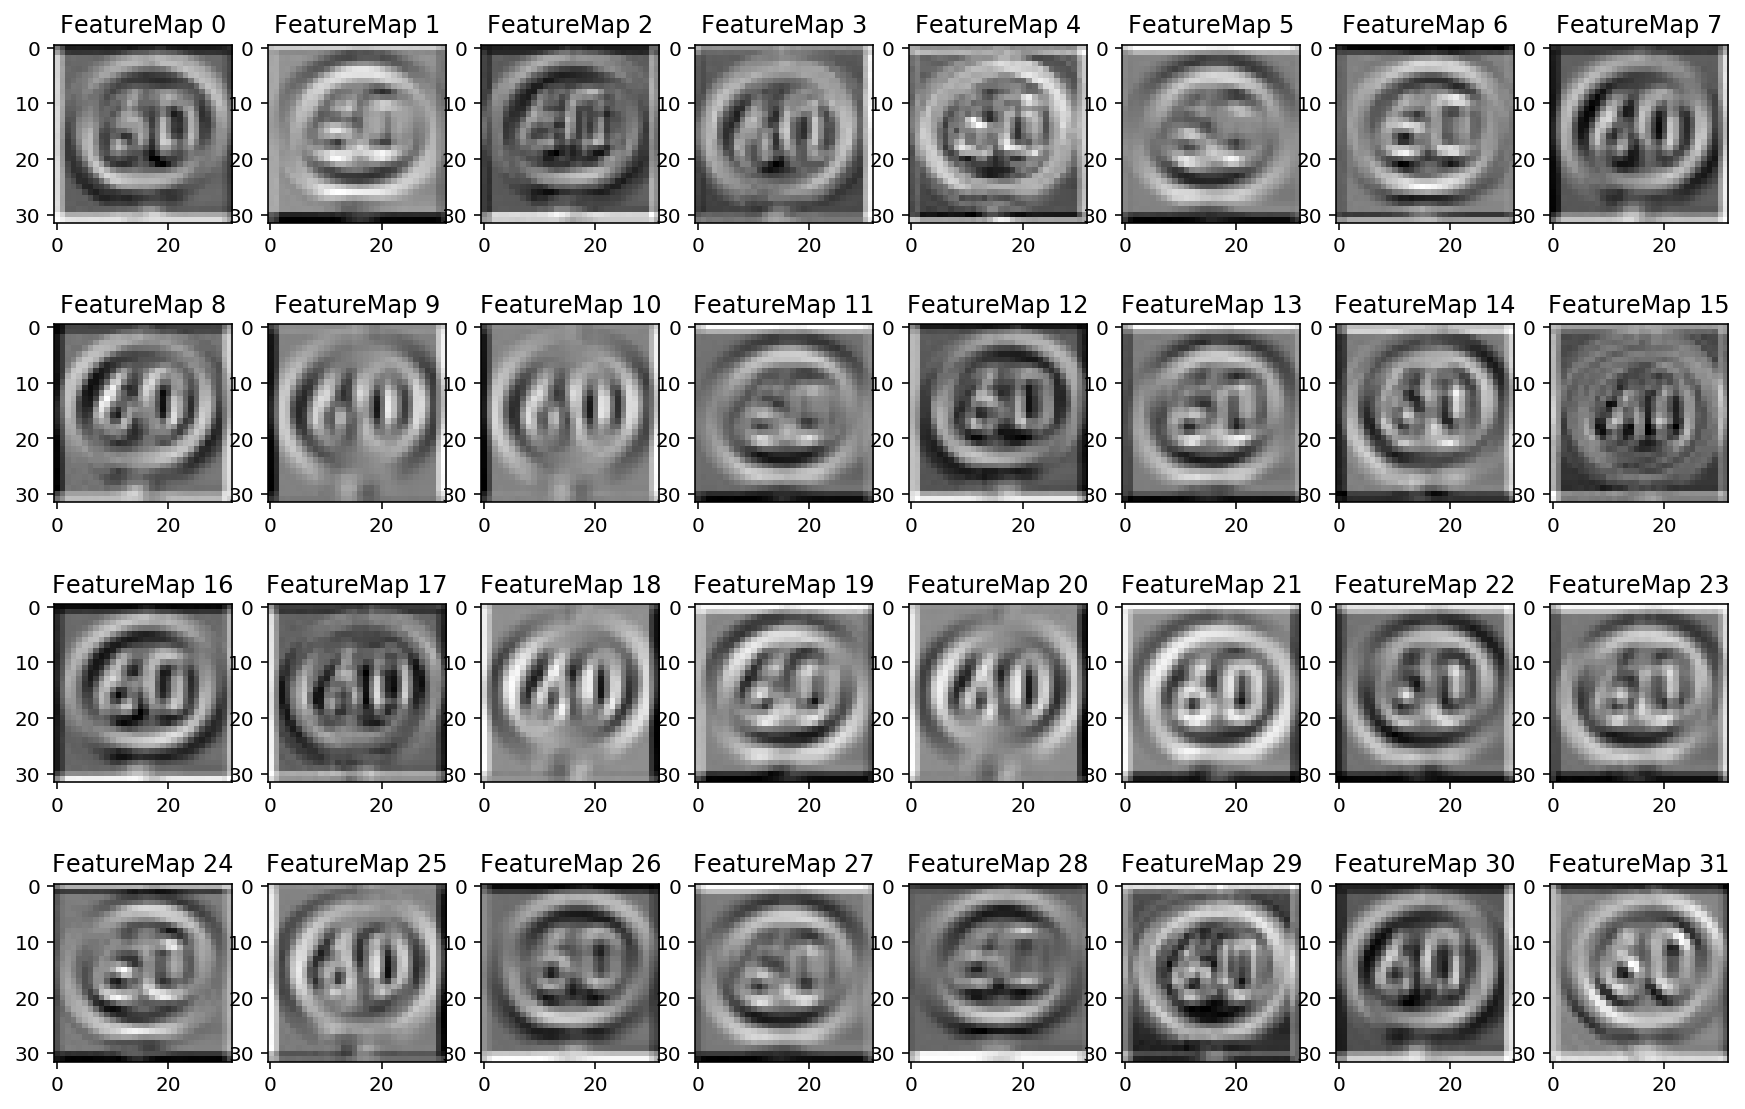

In [141]:
inputs = tuple(zip(*random.sample(list(zip(features_web)), 1)))
#input_img = np.reshape(inputs, (-1,32,32,1))#features_web[0].reshape((-1,32,32,1))
loaded_graph = tf.Graph()
with tf.Session(graph=loaded_graph) as sess:
    # Load trained model here
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

    # Get Tensors from loaded model
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    conv_1 = loaded_graph.get_tensor_by_name('conv_1:0')
    conv_2 = loaded_graph.get_tensor_by_name('conv_2:0')
    conv_3 = loaded_graph.get_tensor_by_name('conv_3:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    with loaded_graph.as_default() as g: 
        outputFeatureMap(sess,inputs[0], conv_1, activation_min=-1, activation_max=-1 ,plt_num=1)
        #outputFeatureMap(sess,inputs[0], conv_2,activation_min=-1, activation_max=-1 ,plt_num=1,  row = 8, column = 8)
        #outputFeatureMap(sess,inputs[0], conv_3, activation_min=-1, activation_max=-1 ,plt_num=1, row = 12, column = 12)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 